In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('C:/Users/pc/Desktop/Project/cardataset_1.csv')
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage()  engine (CC)  \
0  Individual       Manual   First Owner      23.40       1248.0   
1  Individual       Manual  Second Owner      21.14       1498.0   
2  Individual       Manual   Third Owner      17.70       1497.0   
3  Individual       Manual   First Owner      23.00       1396.0   
4  Individual       Manual   First Owner      16.10       1298.0   

  max_power (bhp)                    torque  seats  
0              74            190Nm@ 2000rpm    5.0  
1          103.52       250Nm@ 1500-2500rpm    5.0  
2              78     12.7@ 2,700(kgm@ rpm)    5.0  
3              90  22.4 kgm at 1750-2750rpm    5.0  
4            88.2     11.5@ 4,500(kgm@ rpm)    5.0

In [3]:
df.shape

(8128, 13)

In [4]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage()', 'engine (CC)', 'max_power (bhp)',
       'torque', 'seats'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8128 non-null   object 
 1   year             8128 non-null   int64  
 2   selling_price    8128 non-null   int64  
 3   km_driven        8128 non-null   int64  
 4   fuel             8128 non-null   object 
 5   seller_type      8128 non-null   object 
 6   transmission     8128 non-null   object 
 7   owner            8128 non-null   object 
 8   mileage()        7907 non-null   float64
 9   engine (CC)      7907 non-null   float64
 10  max_power (bhp)  7913 non-null   object 
 11  torque           7906 non-null   object 
 12  seats            7907 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


In [6]:
df["name"] = df["name"].str.split(" ").str.get(0)


In [7]:
df["name"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [8]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [9]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [10]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
df["mileage"]=df["mileage()"]
df.drop(["mileage()"],axis=1,inplace=True)
df.isnull().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
engine (CC)        221
max_power (bhp)    215
torque             222
seats              221
mileage            221
dtype: int64

In [12]:
df.describe()

year  selling_price     km_driven  engine (CC)        seats  \
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000  7907.000000   
mean   2013.804011   6.382718e+05  6.981951e+04  1458.625016     5.416719   
std       4.044249   8.062534e+05  5.655055e+04   503.916303     0.959588   
min    1983.000000   2.999900e+04  1.000000e+00   624.000000     2.000000   
25%    2011.000000   2.549990e+05  3.500000e+04  1197.000000     5.000000   
50%    2015.000000   4.500000e+05  6.000000e+04  1248.000000     5.000000   
75%    2017.000000   6.750000e+05  9.800000e+04  1582.000000     5.000000   
max    2020.000000   1.000000e+07  2.360457e+06  3604.000000    14.000000   

           mileage  
count  7907.000000  
mean     19.418783  
std       4.037145  
min       0.000000  
25%      16.780000  
50%      19.300000  
75%      22.320000  
max      42.000000

### Imputation

In [13]:
df["mileage"].fillna(df["mileage"].mean(),inplace=True)
df["engine (CC)"].fillna(df["engine (CC)"].median(),inplace=True)
df["seats"].fillna(df["seats"].median(),inplace=True)


In [14]:
df.isnull().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
engine (CC)          0
max_power (bhp)    215
torque             222
seats                0
mileage              0
dtype: int64

Drop Columns:

Now if we observe the above dataset, the toruq and max power
column has of no importance to our analysis.


In [15]:

df.drop(["torque"],axis=1,inplace=True)
df.drop(["max_power (bhp)"],axis=1,inplace=True)

In [16]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine (CC)      0
seats            0
mileage          0
dtype: int64

In [17]:
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine (CC)  seats  mileage  
0   First Owner       1248.0    5.0    23.40  
1  Second Owner       1498.0    5.0    21.14  
2   Third Owner       1497.0    5.0    17.70  
3   First Owner       1396.0    5.0    23.00  
4   First Owner       1298.0    5.0    16.10

In [18]:
df["Current_year"]=2022
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine (CC)  seats  mileage  Current_year  
0   First Owner       1248.0    5.0    23.40          2022  
1  Second Owner       1498.0    5.0    21.14          2022  
2   Third Owner       1497.0    5.0    17.70          2022  
3   First Owner       1396.0    5.0    23.00          2022  
4   First Owner       1298.0    5.0    16.10          2022

In [19]:

df["no_year"]=df["Current_year"]-df["year"]
df.drop(["Current_year"],axis=1,inplace=True)
df.drop(["year"],axis=1,inplace=True)
df.head()

name  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti         450000     145500  Diesel  Individual       Manual   
1    Skoda         370000     120000  Diesel  Individual       Manual   
2    Honda         158000     140000  Petrol  Individual       Manual   
3  Hyundai         225000     127000  Diesel  Individual       Manual   
4   Maruti         130000     120000  Petrol  Individual       Manual   

          owner  engine (CC)  seats  mileage  no_year  
0   First Owner       1248.0    5.0    23.40        8  
1  Second Owner       1498.0    5.0    21.14        8  
2   Third Owner       1497.0    5.0    17.70       16  
3   First Owner       1396.0    5.0    23.00       12  
4   First Owner       1298.0    5.0    16.10       15

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

selling_price    420001.0000
km_driven         63000.0000
engine (CC)         385.0000
seats                 0.0000
mileage               5.4775
no_year               6.0000
dtype: float64


In [21]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(5870, 11)


C:\Users\pc\AppData\Local\Temp\ipykernel_2508\2085897488.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [22]:
print(df['selling_price'].skew())
df['selling_price'].describe()



4.193533440675855


count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [23]:
##skewness of 4.19 shows the variable selling price has right skewed distribution

<AxesSubplot:>

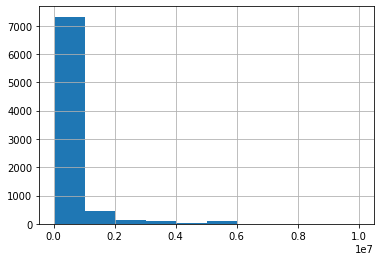

In [24]:
df.selling_price.hist()

### Handling Outliers Selling Price


In [25]:
# Computing 10th, 90th percentiles and replacing the outliers
print(df['selling_price'].quantile(0.10))
print(df['selling_price'].quantile(0.90))

150000.0
1025000.0


In [26]:
df["selling_price"] = np.where(df["selling_price"] <df['selling_price'].quantile(0.10), df['selling_price'].quantile(0.10),df['selling_price'])
df["selling_price"] = np.where(df["selling_price"] >df['selling_price'].quantile(0.90), df['selling_price'].quantile(0.90),df['selling_price'])
print(df['selling_price'].skew())

0.5571499026670337


<AxesSubplot:xlabel='selling_price'>

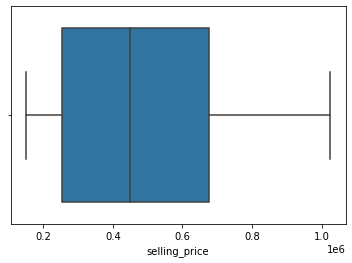

In [27]:
sns.boxplot(x=df["selling_price"])

Handling Outliers mileage 

In [28]:
print(df['mileage'].quantile(0.10))
print(df['mileage'].quantile(0.90))

13.988000000000001
24.7


<AxesSubplot:xlabel='mileage'>

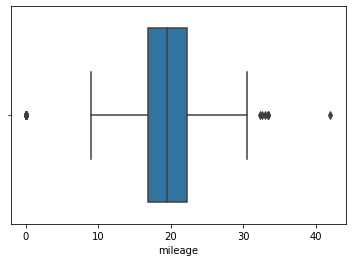

In [29]:
sns.boxplot(x=df["mileage"])

In [30]:
df["mileage"] = np.where(df["mileage"] <df['mileage'].quantile(0.10), df['mileage'].quantile(0.10),df['mileage'])
df["mileage"] = np.where(df["mileage"] >df['mileage'].quantile(0.90), df['mileage'].quantile(0.90),df['mileage'])
print(df['mileage'].skew())

-0.03038353380405013


<AxesSubplot:xlabel='mileage'>

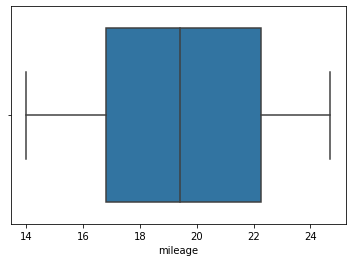

In [31]:
sns.boxplot(x=df["mileage"])

### Handling Outliers Km_driven

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

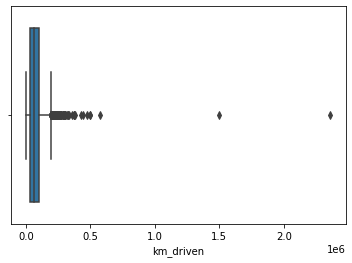

In [32]:
sns.boxplot(df["km_driven"])

In [33]:
df["km_driven"] = np.where(df["km_driven"] <df['km_driven'].quantile(0.10), df['km_driven'].quantile(0.10),df['km_driven'])
df["km_driven"] = np.where(df["km_driven"] >df['km_driven'].quantile(0.90), df['km_driven'].quantile(0.90),df['km_driven'])
print(df['km_driven'].skew())

0.169352986582077


In [34]:
sns.set(style="darkgrid")
sns.boxplot(df["km_driven"])


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

### Handling Outliers engine (CC)

In [35]:
sns.set(style="darkgrid")
sns.boxplot(x=df["engine (CC)"])


<AxesSubplot:xlabel='engine (CC)'>

In [36]:
df["engine (CC)"] = np.where(df["engine (CC)"] <df['engine (CC)'].quantile(0.10), df['engine (CC)'].quantile(0.10),df['engine (CC)'])
df["engine (CC)"] = np.where(df["engine (CC)"] >df['engine (CC)'].quantile(0.90), df['engine (CC)'].quantile(0.90),df['engine (CC)'])
print(df['engine (CC)'].skew())

0.9097318870750064


<AxesSubplot:xlabel='engine (CC)'>

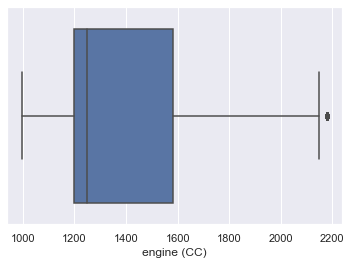

In [37]:
sns.set(style="darkgrid")
sns.boxplot(x=df["engine (CC)"])

# EDA

### Univariate Graphical EDA

### Quantitavie Variable

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

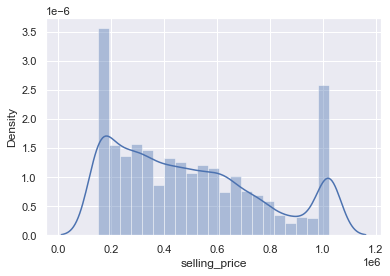

In [38]:
sns.distplot(df["selling_price"])

In [39]:
sns.histplot(df["selling_price"])

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

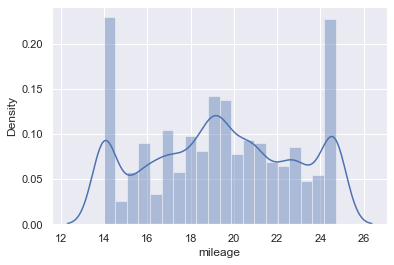

In [40]:
sns.distplot(df["mileage"])

In [41]:
sns.histplot(df["mileage"])

<AxesSubplot:xlabel='mileage', ylabel='Count'>

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

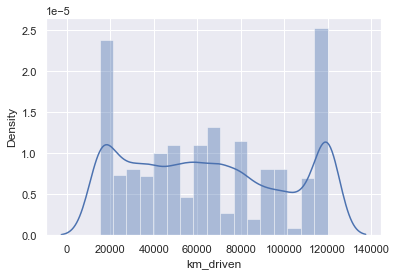

In [42]:
sns.distplot(df["km_driven"])

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

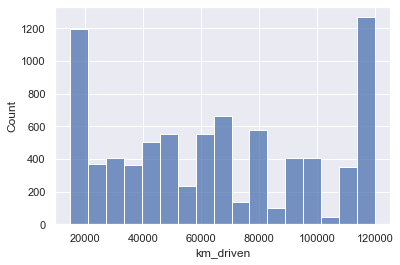

In [43]:
sns.histplot(df["km_driven"])

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engine (CC)', ylabel='Density'>

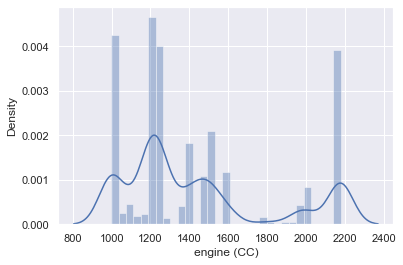

In [44]:
sns.distplot(df["engine (CC)"])

In [45]:
sns.histplot(df["engine (CC)"])

<AxesSubplot:xlabel='engine (CC)', ylabel='Count'>

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='seats', ylabel='Density'>

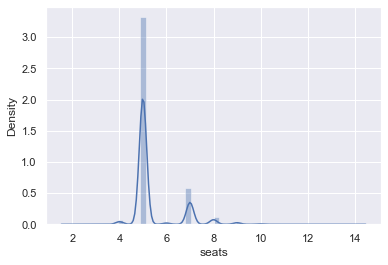

In [46]:
sns.distplot(df["seats"])

In [47]:
sns.histplot(df["seats"])

<AxesSubplot:xlabel='seats', ylabel='Count'>

In [48]:
df['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [49]:
print(df['seats'].skew())

2.015507247545297


In [50]:
df.seats.value_counts()

5.0     6475
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

### Categorical Variable

In [51]:
pd.crosstab(index=df["fuel"],columns="Count")

col_0   Count
fuel         
CNG        57
Diesel   4402
LPG        38
Petrol   3631

In [52]:
sns.countplot(x="fuel",data=df)

<AxesSubplot:xlabel='fuel', ylabel='count'>

<AxesSubplot:xlabel='transmission', ylabel='count'>

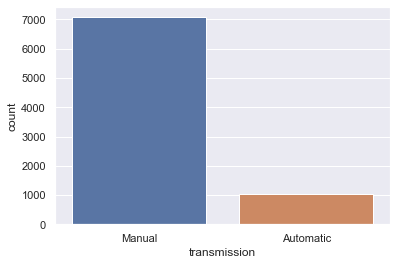

In [53]:
sns.countplot(x="transmission",data=df)

<AxesSubplot:xlabel='owner', ylabel='count'>

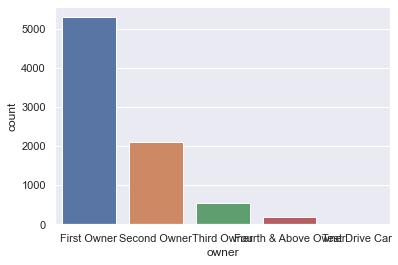

In [54]:
sns.countplot(x="owner",data=df)

<AxesSubplot:xlabel='seller_type', ylabel='count'>

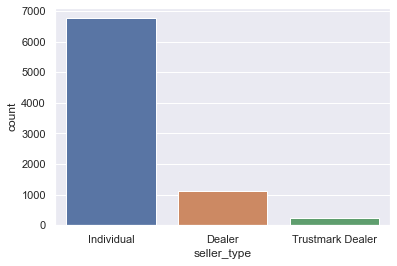

In [55]:
sns.countplot(x="seller_type",data=df)

### Bi-variate Graphical EDA

In [56]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

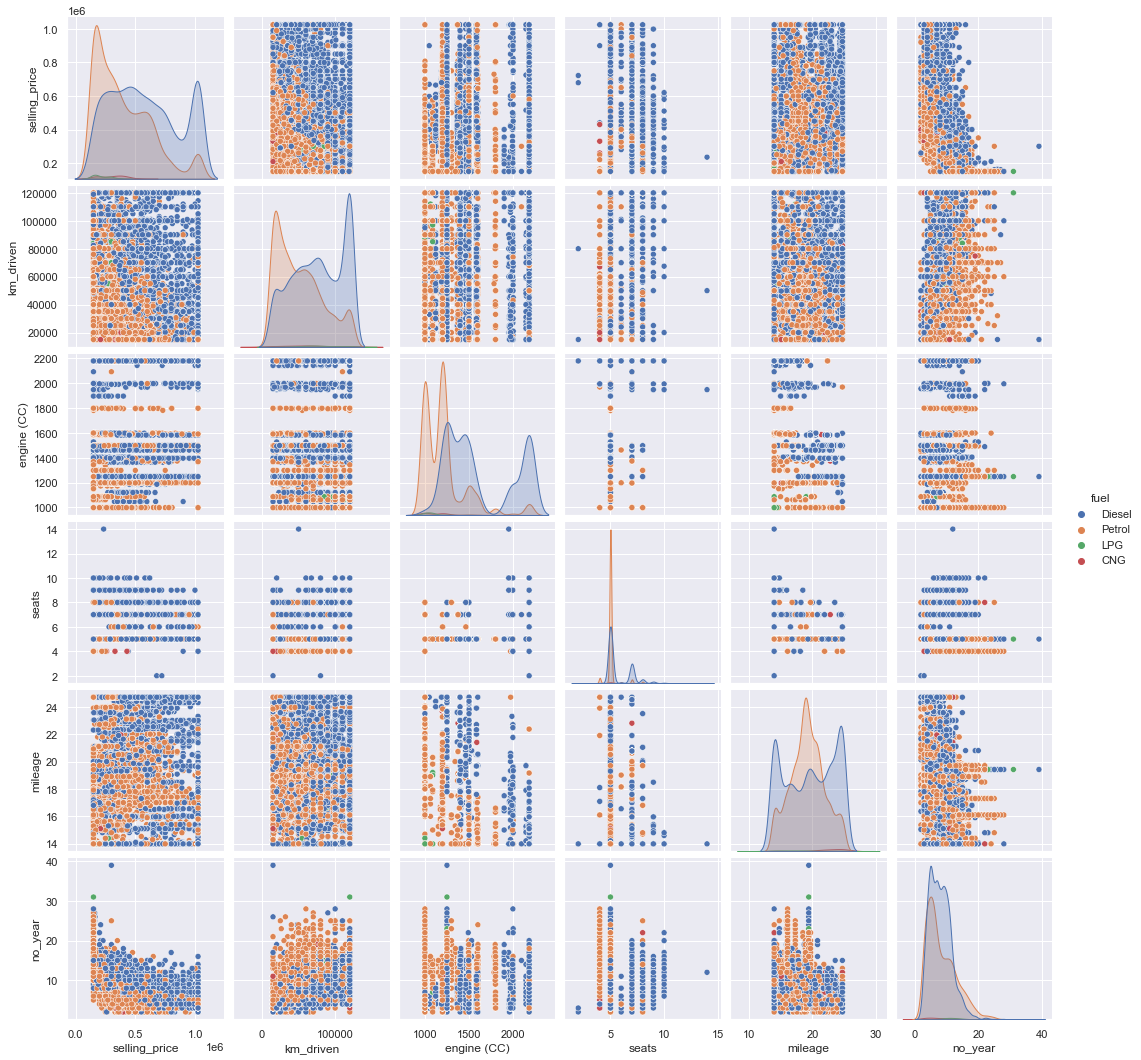

In [57]:
sns.pairplot(df,kind="scatter",hue="fuel")
plt.show()

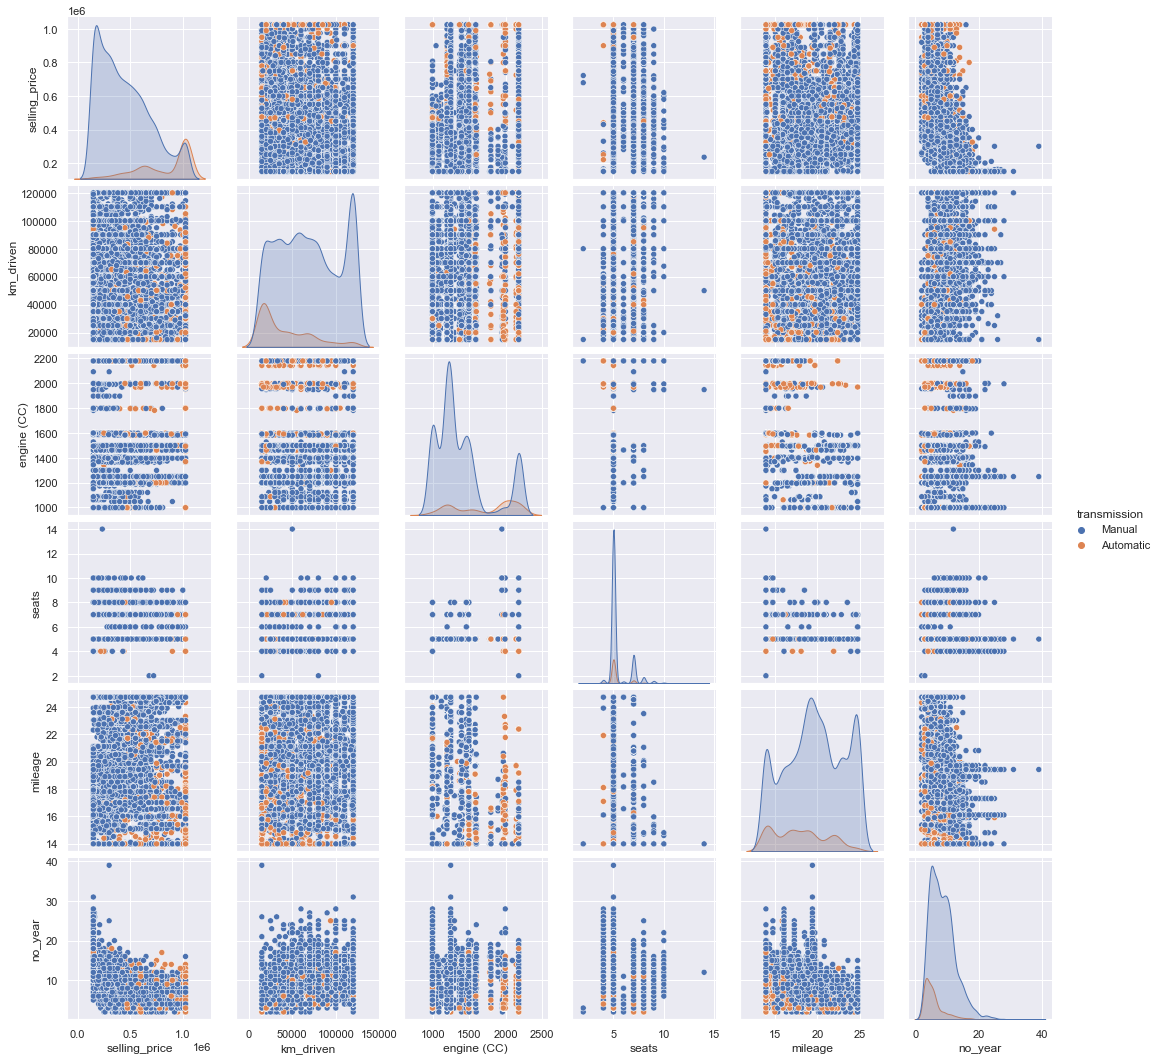

In [58]:
sns.pairplot(df,kind="scatter",hue="transmission")
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [60]:
df = pd.get_dummies(df,drop_first = True)
df.head()


selling_price  km_driven  engine (CC)  seats  mileage  no_year  name_Ashok  \
0       450000.0   120000.0       1248.0    5.0    23.40        8           0   
1       370000.0   120000.0       1498.0    5.0    21.14        8           0   
2       158000.0   120000.0       1497.0    5.0    17.70       16           0   
3       225000.0   120000.0       1396.0    5.0    23.00       12           0   
4       150000.0   120000.0       1298.0    5.0    16.10       15           0   

   name_Audi  name_BMW  name_Chevrolet  ...  fuel_Diesel  fuel_LPG  \
0          0         0               0  ...            1         0   
1          0         0               0  ...            1         0   
2          0         0               0  ...            0         0   
3          0         0               0  ...            1         0   
4          0         0               0  ...            0         0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0            0                       1                             0   
1            0                       1                             0   
2            1                       1                             0   
3            0                       1                             0   
4            1                       1                             0   

   transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                    1                           0                   0   
1                    1                           0                   1   
2                    1                           0                   0   
3                    1                           0                   0   
4                    1                           0                   0   

   owner_Test Drive Car  owner_Third Owner  
0                     0                  0  
1                     0                  0  
2                     0                  1  
3                     0                  0  
4                     0                  0  

[5 rows x 47 columns]

In [61]:
y=df["selling_price"]
X=df.drop(["selling_price"],axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6502, 46)
x test:  (1626, 46)
y train:  (6502,)
y test:  (1626,)


In [63]:
# now let's see the shape of train and test dataset
print(X.shape,X_train.shape,X_test.shape)


(8128, 46) (6502, 46) (1626, 46)


In [64]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

### Linear Regression

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.77577689 0.7728046  0.78091591 0.77555482 0.76732155]
Train CV mean : 0.77


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


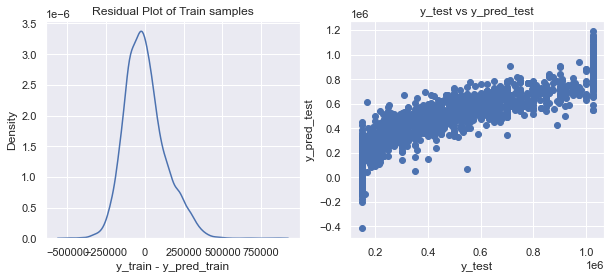

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

### Ridge Regression

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.77580432 0.77325806 0.78262783 0.77519881 0.76782583]
Train CV mean : 0.77


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


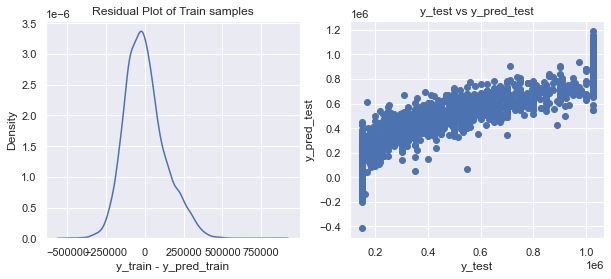

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

### Lasso Regression

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.411e+13, tolerance: 4.011e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.426e+13, tolerance: 4.030e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.415e+13, tolerance: 4.011e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.387e+13, tolerance: 4.023e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.548e+13, tolerance: 3.248e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.491e+13, tolerance: 3.177e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.534e+13, tolerance: 3.227e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.372e+13, tolerance: 3.177e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.535e+13, tolerance: 3.241e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.555e+13, tolerance: 3.245e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.505e+13, tolerance: 3.219e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.530e+13, tolerance: 3.189e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.977e+12, tolerance: 3.168e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+13, tolerance: 3.197e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.533e+13, tolerance: 3.205e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+13, tolerance: 3.255e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

KeyboardInterrupt: 

In [68]:
print('Actual value: ',y_test.iloc[114])

Actual value:  165000.0


In [69]:
rg.fit(X_train,y_train)
ls.fit(X_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.514e+13, tolerance: 5.007e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

# by PCA

In [70]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.53920043, -0.47016057, -0.42725761, ..., -0.59117984,
        -0.02481   , -0.27071512],
       [ 1.53920043,  0.17190478, -0.42725761, ...,  1.69153264,
        -0.02481   , -0.27071512],
       [ 1.53920043,  0.16933652, -0.42725761, ..., -0.59117984,
        -0.02481   ,  3.69392001],
       ...,
       [ 1.53920043, -0.47016057, -0.42725761, ..., -0.59117984,
        -0.02481   , -0.27071512],
       [-1.13812406, -0.09005788, -0.42725761, ..., -0.59117984,
        -0.02481   , -0.27071512],
       [-1.13812406, -0.09005788, -0.42725761, ..., -0.59117984,
        -0.02481   , -0.27071512]])

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 40)

In [72]:
from sklearn.decomposition import PCA

#pca = PCA(n_ccomponents = 2)
pca = PCA(0.95)  # return 95% of useful feature then create new dimension

X_pca = pca.fit_transform(X)
X_pca.shape

(8128, 1)

In [73]:
X_pca

array([[ 54615.18013822],
       [ 54615.74506516],
       [ 54615.74333276],
       ...,
       [ 54615.1805077 ],
       [-40384.24268766],
       [-40384.24268766]])

In [74]:
pca.explained_variance_ratio_

array([0.99988468])

In [75]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y,test_size = 0.2,random_state = 30)

In [76]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train_pca,y_train_pca)

LinearRegression()

In [79]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train_pca,y_train_pca)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train_pca)
    R2_train_model = r2_score(y_train_pca,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test_pca)
    R2_test_model = r2_score(y_test_pca,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train_pca ,y_train_pca ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train_pca-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train_pca - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test_pca vs y_pred_test')
    ax[1].scatter(x = y_test_pca, y = y_pred_test)
    ax[1].set_xlabel('y_test_pca')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.12
Test R2-score : 0.11
Train CV scores : [0.13190634 0.10511469 0.13622285 0.08904678 0.11389372]
Train CV mean : 0.12


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


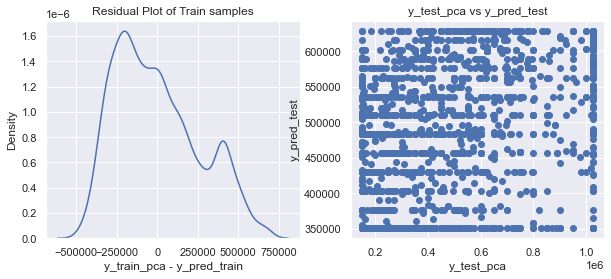

In [80]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

In [70]:
lin_pred = lr.predict(X_test)
rid_pred = rg.predict(X_test)
lasso_pred = ls.predict(X_test)

In [71]:
print('Prediction by Linear Regression: ',lin_pred[114])
print('Prediction by Ridge Regression: ',rid_pred[114])
print('Prediction by Lasso Regression: ',lasso_pred[114])

Prediction by Linear Regression:  205841.89012836106
Prediction by Ridge Regression:  205709.42796205368
Prediction by Lasso Regression:  205721.53892232018


### Random Forest 

In [72]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.91
Test R2-score : 0.88
Train CV scores : [0.88821931 0.8787123  0.90218251 0.89311226 0.8794109 ]
Train CV mean : 0.89


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


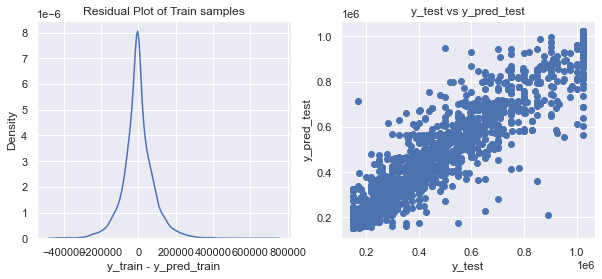

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=8,
                      n_estimators=700)


In [73]:
car_pred_model(rf_rs,'random_forest.pkl')
print(rf_rs.best_estimator_)

### Gradient Boosting

Train R2-score : 0.97
Test R2-score : 0.92
Train CV scores : [0.92120317 0.91474275 0.9259478  0.92120266 0.92062773]
Train CV mean : 0.92


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


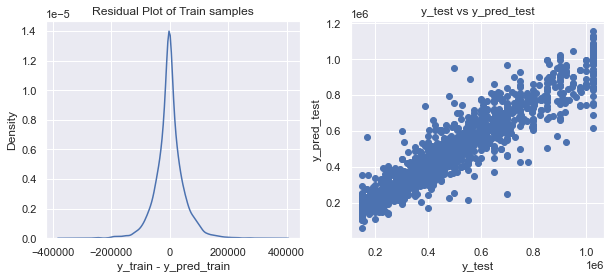

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [75]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

Model  R Squared(Train)  R Squared(Test)  \
0           LinearRegression              0.78             0.78   
1                      Ridge              0.78             0.78   
2                      Lasso              0.78             0.78   
3      RandomForestRegressor              0.91             0.88   
4  GradientBoostingRegressor              0.97             0.92   

   CV score mean(Train)  
0                  0.77  
1                  0.77  
2                  0.77  
3                  0.89  
4                  0.92

In [76]:
lr.predict(X_test)

array([396194.69269485, 741435.03243743, 730182.60818647, ...,
       222274.3370266 , 622587.61518508, 647725.86586703])

In [77]:
X_test.head()


km_driven  engine (CC)  seats  mileage  no_year  name_Ashok  name_Audi  \
1392    80000.0       2179.0    7.0   13.988       17           0          0   
7778    45000.0       2179.0    7.0   17.600        5           0          0   
3727    60000.0       1396.0    5.0   22.540        3           0          0   
6630    15000.0       1199.0    5.0   23.840        2           0          0   
103    100000.0       1196.0    7.0   15.370        6           0          0   

      name_BMW  name_Chevrolet  name_Daewoo  ...  fuel_Diesel  fuel_LPG  \
1392         0               0            0  ...            1         0   
7778         0               0            0  ...            1         0   
3727         0               0            0  ...            1         0   
6630         0               0            0  ...            0         0   
103          0               0            0  ...            0         0   

      fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
1392            0                       1                             0   
7778            0                       1                             0   
3727            0                       1                             0   
6630            1                       1                             0   
103             1                       1                             0   

      transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
1392                    1                           0                   0   
7778                    1                           0                   0   
3727                    1                           0                   0   
6630                    1                           0                   0   
103                     1                           0                   0   

      owner_Test Drive Car  owner_Third Owner  
1392                     0                  0  
7778                     0                  0  
3727                     0                  0  
6630                     0                  0  
103                      0                  1  

[5 rows x 46 columns]

In [78]:
y_test.iloc[0]

250000.0

In [79]:
# prediction by linear regression
lin_pred = lr.predict(X_test)

In [80]:
lin_pred[0]

396194.69269485306

In [81]:
# fitting in ridge regression
rg.fit(X_train,y_train)

Ridge()

In [82]:
# prediction by ridge regression
rid_pred = rg.predict(X_test)

In [83]:
rid_pred[0]

396542.7624439808

In [84]:
# fitting in lasso regression
ls.fit(X_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.514e+13, tolerance: 5.007e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [85]:
# prediction by ridge regression
lasso_pred = ls.predict(X_test)

In [86]:
lasso_pred[0]

395915.8893437494

In [87]:
# fitting in random forrest
rf.fit(X_train,y_train)

RandomForestRegressor()

In [88]:
# prediction by ridge regression
ran_for_pred = rf.predict(X_test)

In [89]:
ran_for_pred[0]

255800.0

In [90]:
# fitting in gradiant boosting
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [91]:
# prediction by ridge regression
grad_pred = gb.predict(X_test)

In [92]:
grad_pred[0]

322336.21933260147

In [100]:
print('Actual value: ',y_test.iloc[401])
print('Prediction by Linear Regression: ',lin_pred[401])
print('Prediction by Ridge Regression: ',rid_pred[401])
print('Prediction by Lasso Regression: ',lasso_pred[401])
print('Prediction by Random Forest: ',ran_for_pred[401])
print('Prediction by Gradiant Boosting: ',grad_pred[401])


Actual value:  235000.0
Prediction by Linear Regression:  170410.00727189844
Prediction by Ridge Regression:  170998.44812621444
Prediction by Lasso Regression:  170295.11713566876
Prediction by Random Forest:  243299.98
Prediction by Gradiant Boosting:  236904.69217178048


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('C:/Users/pc/Desktop/Project/cardataset_1.csv')
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage()  engine (CC)  \
0  Individual       Manual   First Owner      23.40       1248.0   
1  Individual       Manual  Second Owner      21.14       1498.0   
2  Individual       Manual   Third Owner      17.70       1497.0   
3  Individual       Manual   First Owner      23.00       1396.0   
4  Individual       Manual   First Owner      16.10       1298.0   

  max_power (bhp)                    torque  seats  
0              74            190Nm@ 2000rpm    5.0  
1          103.52       250Nm@ 1500-2500rpm    5.0  
2              78     12.7@ 2,700(kgm@ rpm)    5.0  
3              90  22.4 kgm at 1750-2750rpm    5.0  
4            88.2     11.5@ 4,500(kgm@ rpm)    5.0

In [3]:
df.shape

(8128, 13)

In [4]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage()', 'engine (CC)', 'max_power (bhp)',
       'torque', 'seats'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8128 non-null   object 
 1   year             8128 non-null   int64  
 2   selling_price    8128 non-null   int64  
 3   km_driven        8128 non-null   int64  
 4   fuel             8128 non-null   object 
 5   seller_type      8128 non-null   object 
 6   transmission     8128 non-null   object 
 7   owner            8128 non-null   object 
 8   mileage()        7907 non-null   float64
 9   engine (CC)      7907 non-null   float64
 10  max_power (bhp)  7913 non-null   object 
 11  torque           7906 non-null   object 
 12  seats            7907 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


In [6]:
df["name"] = df["name"].str.split(" ").str.get(0)


In [7]:
df["name"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [8]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [9]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [10]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
df["mileage"]=df["mileage()"]
df.drop(["mileage()"],axis=1,inplace=True)
df.isnull().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
engine (CC)        221
max_power (bhp)    215
torque             222
seats              221
mileage            221
dtype: int64

In [12]:
df.describe()

year  selling_price     km_driven  engine (CC)        seats  \
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000  7907.000000   
mean   2013.804011   6.382718e+05  6.981951e+04  1458.625016     5.416719   
std       4.044249   8.062534e+05  5.655055e+04   503.916303     0.959588   
min    1983.000000   2.999900e+04  1.000000e+00   624.000000     2.000000   
25%    2011.000000   2.549990e+05  3.500000e+04  1197.000000     5.000000   
50%    2015.000000   4.500000e+05  6.000000e+04  1248.000000     5.000000   
75%    2017.000000   6.750000e+05  9.800000e+04  1582.000000     5.000000   
max    2020.000000   1.000000e+07  2.360457e+06  3604.000000    14.000000   

           mileage  
count  7907.000000  
mean     19.418783  
std       4.037145  
min       0.000000  
25%      16.780000  
50%      19.300000  
75%      22.320000  
max      42.000000

### Imputation

In [13]:
df["mileage"].fillna(df["mileage"].mean(),inplace=True)
df["engine (CC)"].fillna(df["engine (CC)"].median(),inplace=True)
df["seats"].fillna(df["seats"].median(),inplace=True)


In [14]:
df.isnull().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
engine (CC)          0
max_power (bhp)    215
torque             222
seats                0
mileage              0
dtype: int64

Drop Columns:

Now if we observe the above dataset, the toruq and max power
column has of no importance to our analysis.


In [15]:

df.drop(["torque"],axis=1,inplace=True)
df.drop(["max_power (bhp)"],axis=1,inplace=True)

In [16]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine (CC)      0
seats            0
mileage          0
dtype: int64

In [17]:
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine (CC)  seats  mileage  
0   First Owner       1248.0    5.0    23.40  
1  Second Owner       1498.0    5.0    21.14  
2   Third Owner       1497.0    5.0    17.70  
3   First Owner       1396.0    5.0    23.00  
4   First Owner       1298.0    5.0    16.10

In [18]:
df["Current_year"]=2022
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine (CC)  seats  mileage  Current_year  
0   First Owner       1248.0    5.0    23.40          2022  
1  Second Owner       1498.0    5.0    21.14          2022  
2   Third Owner       1497.0    5.0    17.70          2022  
3   First Owner       1396.0    5.0    23.00          2022  
4   First Owner       1298.0    5.0    16.10          2022

In [19]:

df["no_year"]=df["Current_year"]-df["year"]
df.drop(["Current_year"],axis=1,inplace=True)
df.drop(["year"],axis=1,inplace=True)
df.head()

name  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti         450000     145500  Diesel  Individual       Manual   
1    Skoda         370000     120000  Diesel  Individual       Manual   
2    Honda         158000     140000  Petrol  Individual       Manual   
3  Hyundai         225000     127000  Diesel  Individual       Manual   
4   Maruti         130000     120000  Petrol  Individual       Manual   

          owner  engine (CC)  seats  mileage  no_year  
0   First Owner       1248.0    5.0    23.40        8  
1  Second Owner       1498.0    5.0    21.14        8  
2   Third Owner       1497.0    5.0    17.70       16  
3   First Owner       1396.0    5.0    23.00       12  
4   First Owner       1298.0    5.0    16.10       15

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

selling_price    420001.0000
km_driven         63000.0000
engine (CC)         385.0000
seats                 0.0000
mileage               5.4775
no_year               6.0000
dtype: float64


In [21]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(5870, 11)


C:\Users\pc\AppData\Local\Temp\ipykernel_10596\2085897488.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [22]:
print(df['selling_price'].skew())
df['selling_price'].describe()



4.193533440675855


count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [23]:
##skewness of 4.19 shows the variable selling price has right skewed distribution

<AxesSubplot:>

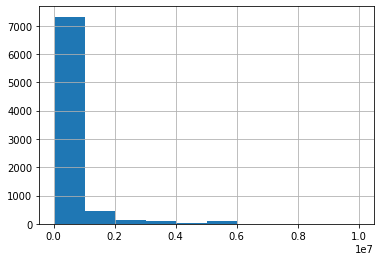

In [24]:
df.selling_price.hist()

### Handling Outliers Selling Price


In [25]:
# Computing 10th, 90th percentiles and replacing the outliers
print(df['selling_price'].quantile(0.10))
print(df['selling_price'].quantile(0.90))

150000.0
1025000.0


In [26]:
df["selling_price"] = np.where(df["selling_price"] <df['selling_price'].quantile(0.10), df['selling_price'].quantile(0.10),df['selling_price'])
df["selling_price"] = np.where(df["selling_price"] >df['selling_price'].quantile(0.90), df['selling_price'].quantile(0.90),df['selling_price'])
print(df['selling_price'].skew())

0.5571499026670337


<AxesSubplot:xlabel='selling_price'>

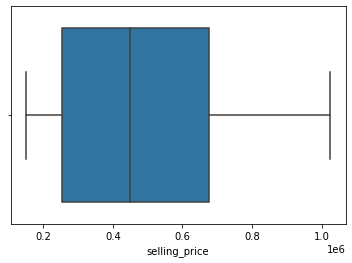

In [27]:
sns.boxplot(x=df["selling_price"])

Handling Outliers mileage 

In [28]:
print(df['mileage'].quantile(0.10))
print(df['mileage'].quantile(0.90))

13.988000000000001
24.7


<AxesSubplot:xlabel='mileage'>

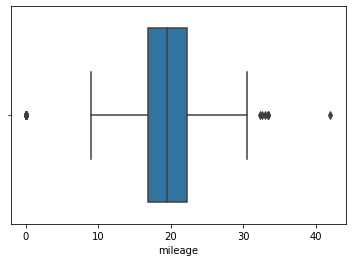

In [29]:
sns.boxplot(x=df["mileage"])

In [30]:
df["mileage"] = np.where(df["mileage"] <df['mileage'].quantile(0.10), df['mileage'].quantile(0.10),df['mileage'])
df["mileage"] = np.where(df["mileage"] >df['mileage'].quantile(0.90), df['mileage'].quantile(0.90),df['mileage'])
print(df['mileage'].skew())

-0.03038353380405013


<AxesSubplot:xlabel='mileage'>

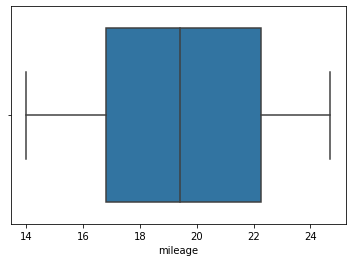

In [31]:
sns.boxplot(x=df["mileage"])

### Handling Outliers Km_driven

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

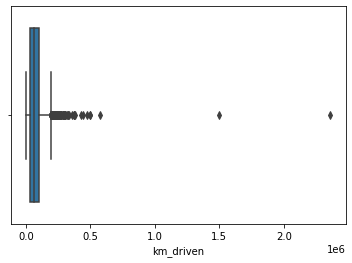

In [32]:
sns.boxplot(df["km_driven"])

In [33]:
df["km_driven"] = np.where(df["km_driven"] <df['km_driven'].quantile(0.10), df['km_driven'].quantile(0.10),df['km_driven'])
df["km_driven"] = np.where(df["km_driven"] >df['km_driven'].quantile(0.90), df['km_driven'].quantile(0.90),df['km_driven'])
print(df['km_driven'].skew())

0.169352986582077


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

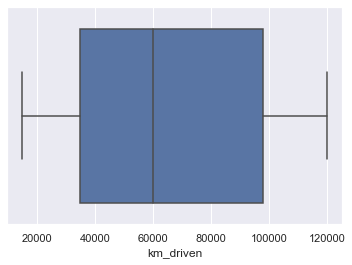

In [34]:
sns.set(style="darkgrid")
sns.boxplot(df["km_driven"])


### Handling Outliers engine (CC)

<AxesSubplot:xlabel='engine (CC)'>

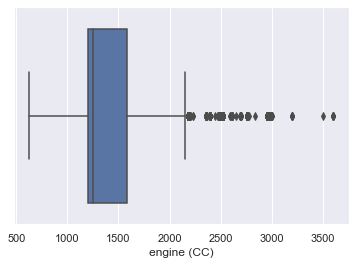

In [35]:
sns.set(style="darkgrid")
sns.boxplot(x=df["engine (CC)"])


In [36]:
df["engine (CC)"] = np.where(df["engine (CC)"] <df['engine (CC)'].quantile(0.10), df['engine (CC)'].quantile(0.10),df['engine (CC)'])
df["engine (CC)"] = np.where(df["engine (CC)"] >df['engine (CC)'].quantile(0.90), df['engine (CC)'].quantile(0.90),df['engine (CC)'])
print(df['engine (CC)'].skew())

0.9097318870750064


<AxesSubplot:xlabel='engine (CC)'>

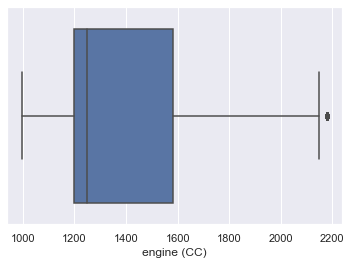

In [37]:
sns.set(style="darkgrid")
sns.boxplot(x=df["engine (CC)"])

# EDA

### Univariate Graphical EDA

### Quantitavie Variable

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

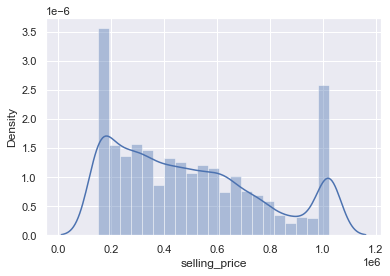

In [38]:
sns.distplot(df["selling_price"])

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

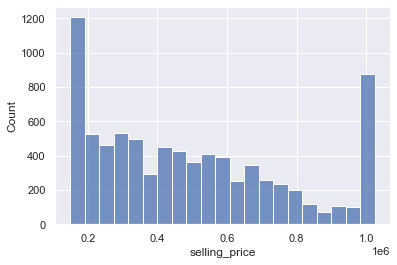

In [39]:
sns.histplot(df["selling_price"])

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

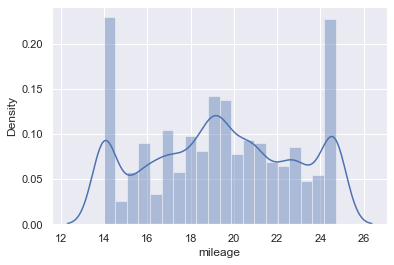

In [40]:
sns.distplot(df["mileage"])

<AxesSubplot:xlabel='mileage', ylabel='Count'>

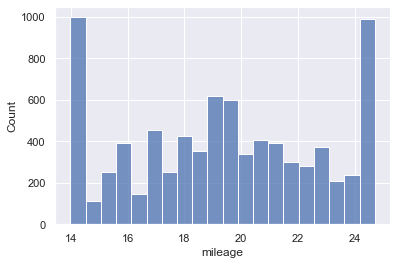

In [41]:
sns.histplot(df["mileage"])

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

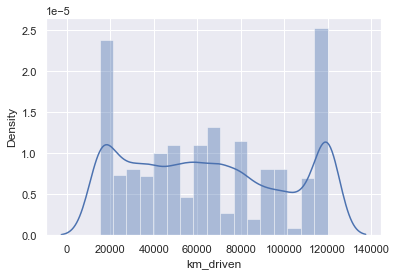

In [42]:
sns.distplot(df["km_driven"])

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

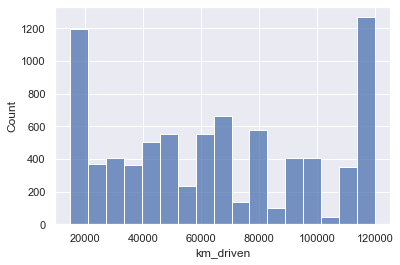

In [43]:
sns.histplot(df["km_driven"])

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engine (CC)', ylabel='Density'>

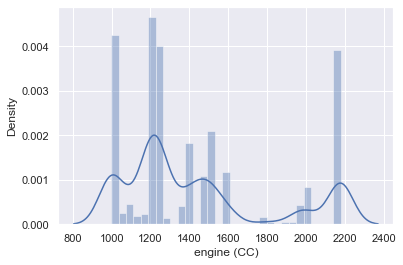

In [44]:
sns.distplot(df["engine (CC)"])

<AxesSubplot:xlabel='engine (CC)', ylabel='Count'>

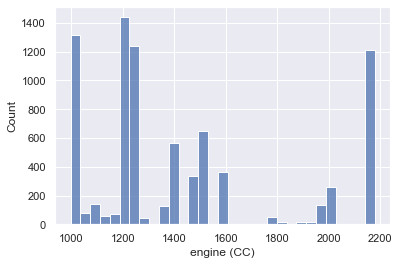

In [45]:
sns.histplot(df["engine (CC)"])

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='seats', ylabel='Density'>

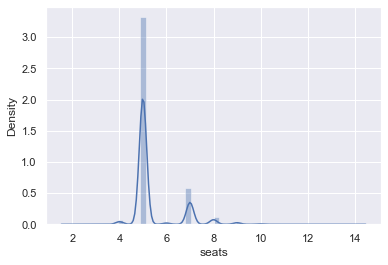

In [46]:
sns.distplot(df["seats"])

<AxesSubplot:xlabel='seats', ylabel='Count'>

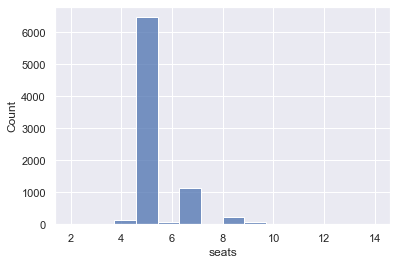

In [47]:
sns.histplot(df["seats"])

In [48]:
df['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [49]:
print(df['seats'].skew())

2.015507247545297


In [50]:
df.seats.value_counts()

5.0     6475
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

### Categorical Variable

In [51]:
pd.crosstab(index=df["fuel"],columns="Count")

col_0   Count
fuel         
CNG        57
Diesel   4402
LPG        38
Petrol   3631

<AxesSubplot:xlabel='fuel', ylabel='count'>

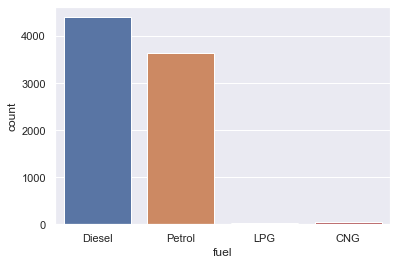

In [52]:
sns.countplot(x="fuel",data=df)

<AxesSubplot:xlabel='transmission', ylabel='count'>

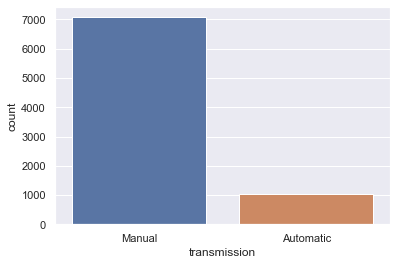

In [53]:
sns.countplot(x="transmission",data=df)

<AxesSubplot:xlabel='owner', ylabel='count'>

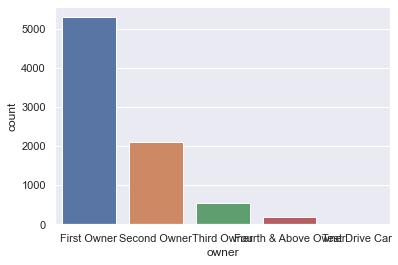

In [54]:
sns.countplot(x="owner",data=df)

<AxesSubplot:xlabel='seller_type', ylabel='count'>

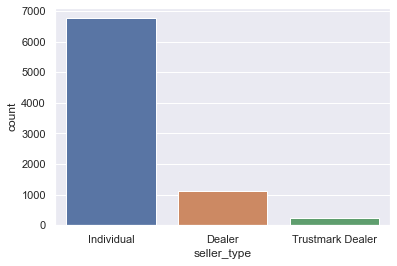

In [55]:
sns.countplot(x="seller_type",data=df)

### Bi-variate Graphical EDA

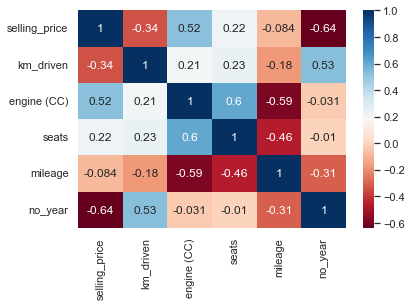

In [56]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

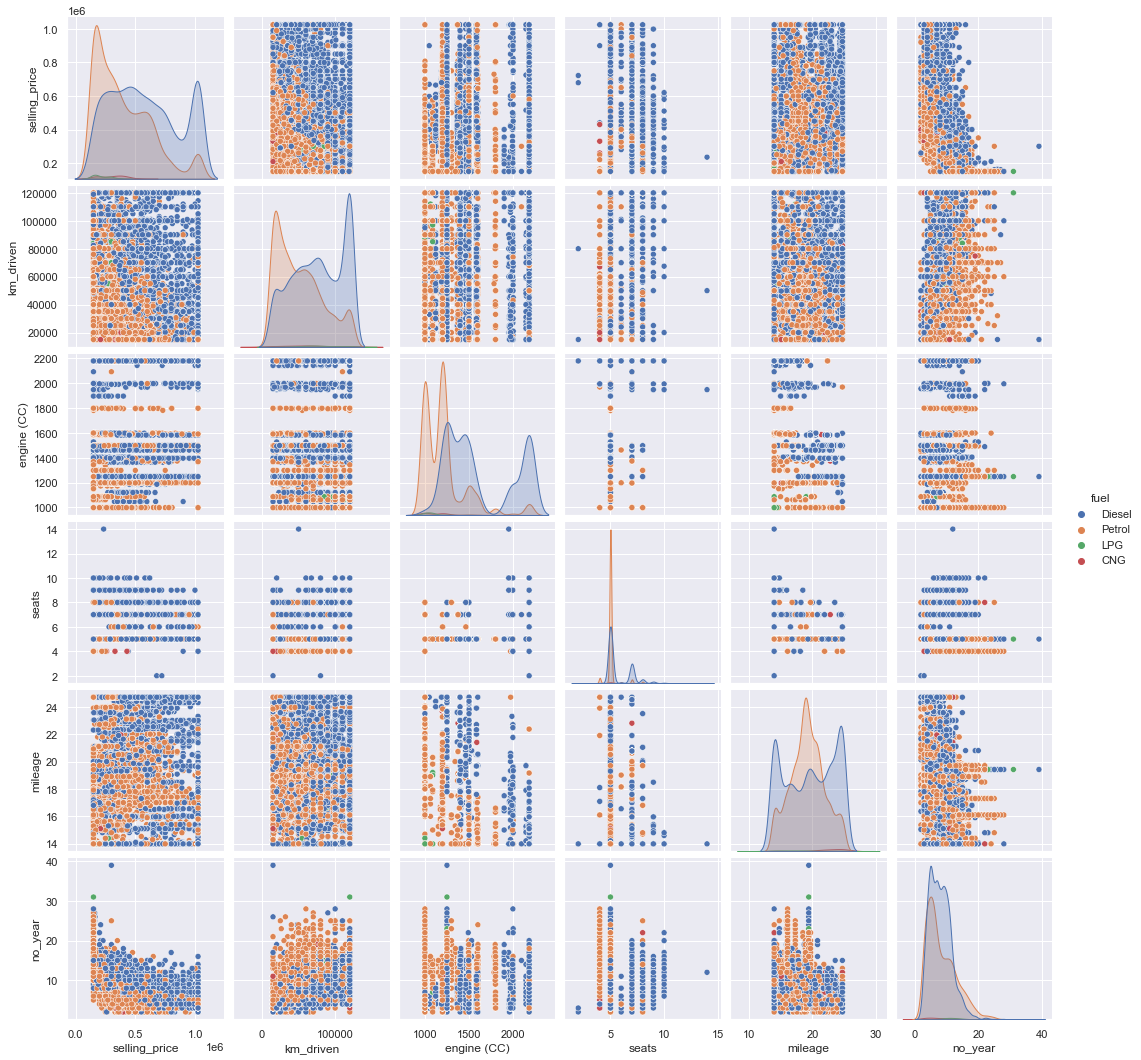

In [57]:
sns.pairplot(df,kind="scatter",hue="fuel")
plt.show()

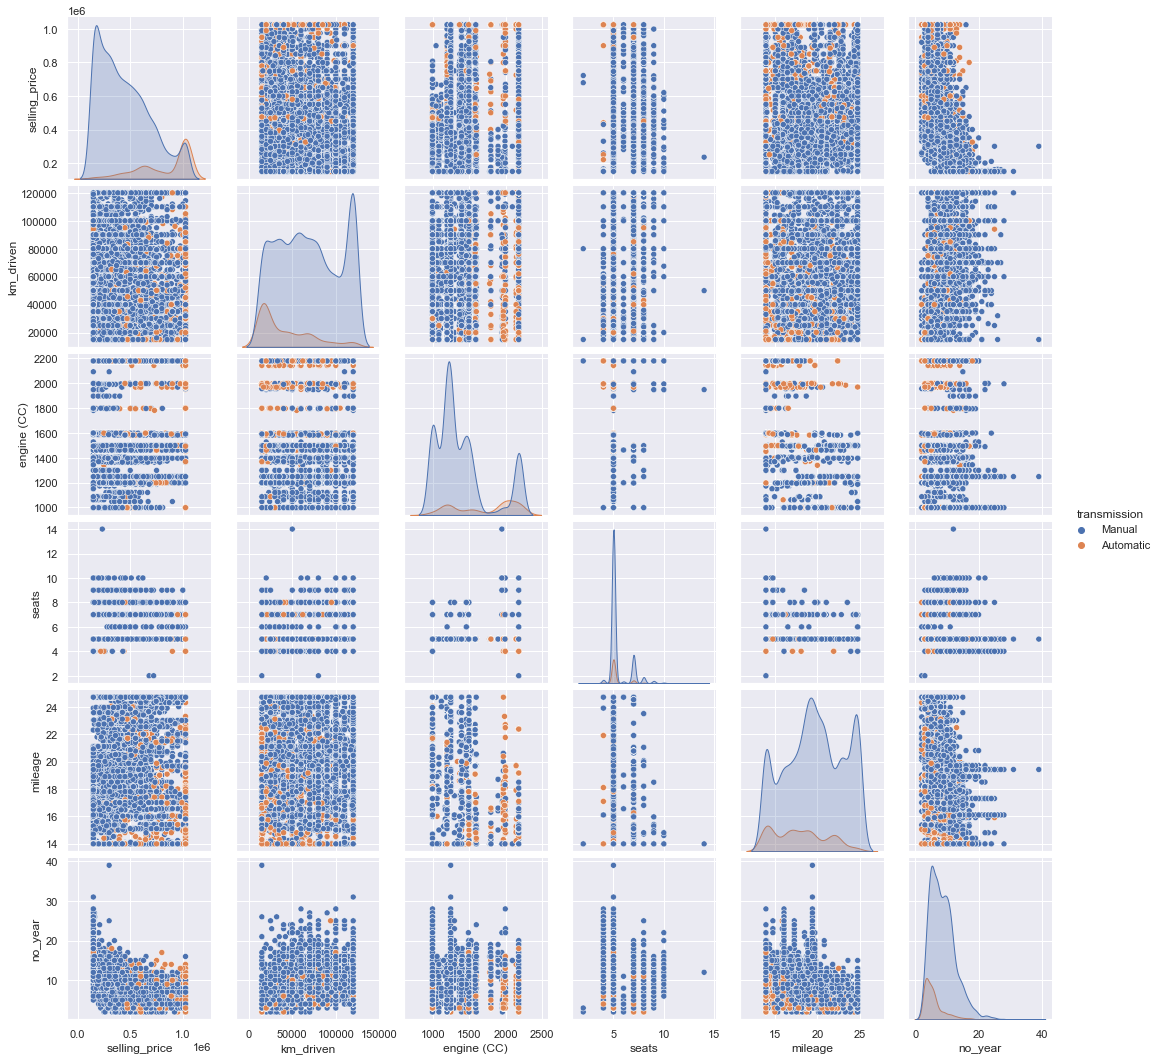

In [58]:
sns.pairplot(df,kind="scatter",hue="transmission")
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [60]:
df = pd.get_dummies(df,drop_first = True)
df.head()


selling_price  km_driven  engine (CC)  seats  mileage  no_year  name_Ashok  \
0       450000.0   120000.0       1248.0    5.0    23.40        8           0   
1       370000.0   120000.0       1498.0    5.0    21.14        8           0   
2       158000.0   120000.0       1497.0    5.0    17.70       16           0   
3       225000.0   120000.0       1396.0    5.0    23.00       12           0   
4       150000.0   120000.0       1298.0    5.0    16.10       15           0   

   name_Audi  name_BMW  name_Chevrolet  ...  fuel_Diesel  fuel_LPG  \
0          0         0               0  ...            1         0   
1          0         0               0  ...            1         0   
2          0         0               0  ...            0         0   
3          0         0               0  ...            1         0   
4          0         0               0  ...            0         0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0            0                       1                             0   
1            0                       1                             0   
2            1                       1                             0   
3            0                       1                             0   
4            1                       1                             0   

   transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                    1                           0                   0   
1                    1                           0                   1   
2                    1                           0                   0   
3                    1                           0                   0   
4                    1                           0                   0   

   owner_Test Drive Car  owner_Third Owner  
0                     0                  0  
1                     0                  0  
2                     0                  1  
3                     0                  0  
4                     0                  0  

[5 rows x 47 columns]

In [61]:
y=df["selling_price"]
X=df.drop(["selling_price"],axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6502, 46)
x test:  (1626, 46)
y train:  (6502,)
y test:  (1626,)


In [63]:
# now let's see the shape of train and test dataset
print(X.shape,X_train.shape,X_test.shape)


(8128, 46) (6502, 46) (1626, 46)


In [64]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

### Linear Regression

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.77577689 0.7728046  0.78091591 0.77555482 0.76732155]
Train CV mean : 0.77


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


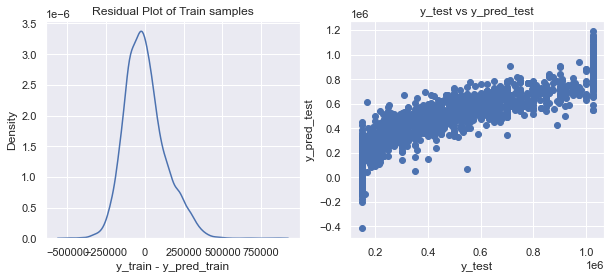

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

### Ridge Regression

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.77580432 0.77325806 0.78262783 0.77482745 0.76782583]
Train CV mean : 0.77


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


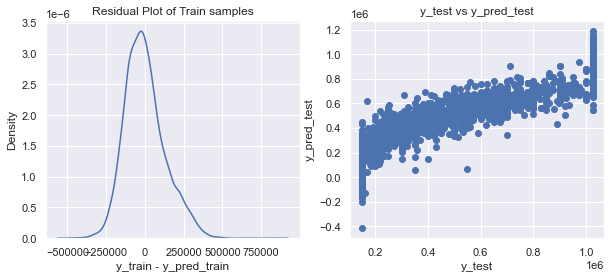

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

### Lasso Regression

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.411e+13, tolerance: 4.011e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.426e+13, tolerance: 4.030e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.416e+13, tolerance: 4.011e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.395e+13, tolerance: 4.023e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.619e+13, tolerance: 3.222e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.549e+13, tolerance: 3.248e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.493e+13, tolerance: 3.177e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.514e+13, tolerance: 3.171e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.535e+13, tolerance: 3.241e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.555e+13, tolerance: 3.245e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.164e+13, tolerance: 3.134e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.282e+13, tolerance: 3.163e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.976e+12, tolerance: 3.168e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.505e+13, tolerance: 3.147e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e+13, tolerance: 3.160e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.529e+13, tolerance: 3.226e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e+13, tolerance: 3.160e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.528e+13, tolerance: 3.226e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.783e+12, tolerance: 3.207e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.508e+13, tolerance: 3.154e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.7759082  0.77333678 0.78260017 0.77534959 0.76775624]
Train CV mean : 0.77


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


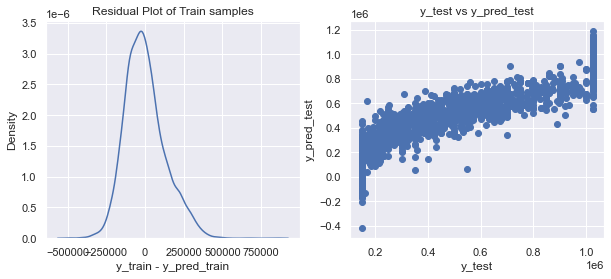

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

In [68]:
print('Actual value: ',y_test.iloc[114])

Actual value:  165000.0


In [69]:
rg.fit(X_train,y_train)
ls.fit(X_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.514e+13, tolerance: 5.007e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [70]:
lin_pred = lr.predict(X_test)
rid_pred = rg.predict(X_test)
lasso_pred = ls.predict(X_test)

In [71]:
print('Prediction by Linear Regression: ',lin_pred[114])
print('Prediction by Ridge Regression: ',rid_pred[114])
print('Prediction by Lasso Regression: ',lasso_pred[114])

Prediction by Linear Regression:  205841.89012836106
Prediction by Ridge Regression:  205709.42796205368
Prediction by Lasso Regression:  205721.53892232018


### Random Forest 

In [72]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.91
Test R2-score : 0.88
Train CV scores : [0.88821931 0.8787123  0.90218251 0.89311226 0.8794109 ]
Train CV mean : 0.89


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


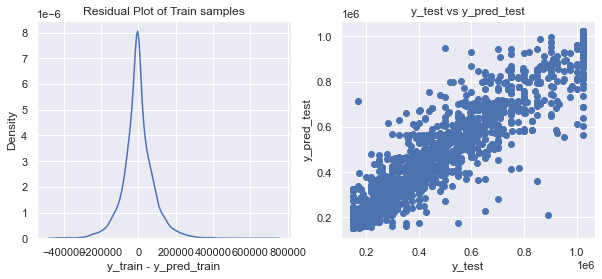

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=8,
                      n_estimators=700)


In [73]:
car_pred_model(rf_rs,'random_forest.pkl')
print(rf_rs.best_estimator_)

### Gradient Boosting

Train R2-score : 0.97
Test R2-score : 0.92
Train CV scores : [0.92120317 0.91474275 0.9259478  0.92120266 0.92062773]
Train CV mean : 0.92


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


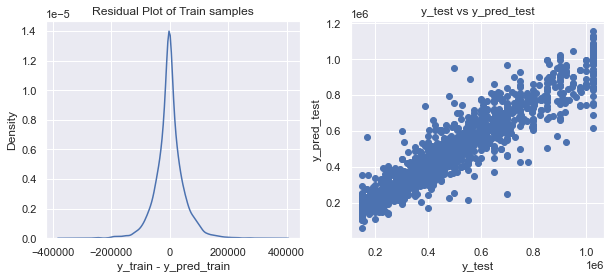

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [75]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

Model  R Squared(Train)  R Squared(Test)  \
0           LinearRegression              0.78             0.78   
1                      Ridge              0.78             0.78   
2                      Lasso              0.78             0.78   
3      RandomForestRegressor              0.91             0.88   
4  GradientBoostingRegressor              0.97             0.92   

   CV score mean(Train)  
0                  0.77  
1                  0.77  
2                  0.77  
3                  0.89  
4                  0.92

In [76]:
lr.predict(X_test)

array([396194.69269485, 741435.03243743, 730182.60818647, ...,
       222274.3370266 , 622587.61518508, 647725.86586703])

In [77]:
X_test.head()


km_driven  engine (CC)  seats  mileage  no_year  name_Ashok  name_Audi  \
1392    80000.0       2179.0    7.0   13.988       17           0          0   
7778    45000.0       2179.0    7.0   17.600        5           0          0   
3727    60000.0       1396.0    5.0   22.540        3           0          0   
6630    15000.0       1199.0    5.0   23.840        2           0          0   
103    100000.0       1196.0    7.0   15.370        6           0          0   

      name_BMW  name_Chevrolet  name_Daewoo  ...  fuel_Diesel  fuel_LPG  \
1392         0               0            0  ...            1         0   
7778         0               0            0  ...            1         0   
3727         0               0            0  ...            1         0   
6630         0               0            0  ...            0         0   
103          0               0            0  ...            0         0   

      fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
1392            0                       1                             0   
7778            0                       1                             0   
3727            0                       1                             0   
6630            1                       1                             0   
103             1                       1                             0   

      transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
1392                    1                           0                   0   
7778                    1                           0                   0   
3727                    1                           0                   0   
6630                    1                           0                   0   
103                     1                           0                   0   

      owner_Test Drive Car  owner_Third Owner  
1392                     0                  0  
7778                     0                  0  
3727                     0                  0  
6630                     0                  0  
103                      0                  1  

[5 rows x 46 columns]

In [78]:
y_test.iloc[0]

250000.0

In [79]:
# prediction by linear regression
lin_pred = lr.predict(X_test)

In [80]:
lin_pred[0]

396194.69269485306

In [81]:
# fitting in ridge regression
rg.fit(X_train,y_train)

Ridge()

In [82]:
# prediction by ridge regression
rid_pred = rg.predict(X_test)

In [83]:
rid_pred[0]

396542.7624439808

In [84]:
# fitting in lasso regression
ls.fit(X_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.514e+13, tolerance: 5.007e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [85]:
# prediction by ridge regression
lasso_pred = ls.predict(X_test)

In [86]:
lasso_pred[0]

395915.8893437494

In [87]:
# fitting in random forrest
rf.fit(X_train,y_train)

RandomForestRegressor()

In [88]:
# prediction by ridge regression
ran_for_pred = rf.predict(X_test)

In [89]:
ran_for_pred[0]

255800.0

In [90]:
# fitting in gradiant boosting
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [91]:
# prediction by ridge regression
grad_pred = gb.predict(X_test)

In [92]:
grad_pred[0]

322336.21933260147

In [100]:
print('Actual value: ',y_test.iloc[401])
print('Prediction by Linear Regression: ',lin_pred[401])
print('Prediction by Ridge Regression: ',rid_pred[401])
print('Prediction by Lasso Regression: ',lasso_pred[401])
print('Prediction by Random Forest: ',ran_for_pred[401])
print('Prediction by Gradiant Boosting: ',grad_pred[401])


Actual value:  235000.0
Prediction by Linear Regression:  170410.00727189844
Prediction by Ridge Regression:  170998.44812621444
Prediction by Lasso Regression:  170295.11713566876
Prediction by Random Forest:  243299.98
Prediction by Gradiant Boosting:  236904.69217178048


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('C:/Users/pc/Desktop/Project/cardataset_1.csv')
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage()  engine (CC)  \
0  Individual       Manual   First Owner      23.40       1248.0   
1  Individual       Manual  Second Owner      21.14       1498.0   
2  Individual       Manual   Third Owner      17.70       1497.0   
3  Individual       Manual   First Owner      23.00       1396.0   
4  Individual       Manual   First Owner      16.10       1298.0   

  max_power (bhp)                    torque  seats  
0              74            190Nm@ 2000rpm    5.0  
1          103.52       250Nm@ 1500-2500rpm    5.0  
2              78     12.7@ 2,700(kgm@ rpm)    5.0  
3              90  22.4 kgm at 1750-2750rpm    5.0  
4            88.2     11.5@ 4,500(kgm@ rpm)    5.0

In [3]:
df.shape

(8128, 13)

In [4]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage()', 'engine (CC)', 'max_power (bhp)',
       'torque', 'seats'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8128 non-null   object 
 1   year             8128 non-null   int64  
 2   selling_price    8128 non-null   int64  
 3   km_driven        8128 non-null   int64  
 4   fuel             8128 non-null   object 
 5   seller_type      8128 non-null   object 
 6   transmission     8128 non-null   object 
 7   owner            8128 non-null   object 
 8   mileage()        7907 non-null   float64
 9   engine (CC)      7907 non-null   float64
 10  max_power (bhp)  7913 non-null   object 
 11  torque           7906 non-null   object 
 12  seats            7907 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


In [6]:
df["name"] = df["name"].str.split(" ").str.get(0)


In [7]:
df["name"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [8]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [9]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [10]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
df["mileage"]=df["mileage()"]
df.drop(["mileage()"],axis=1,inplace=True)
df.isnull().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
engine (CC)        221
max_power (bhp)    215
torque             222
seats              221
mileage            221
dtype: int64

In [12]:
df.describe()

year  selling_price     km_driven  engine (CC)        seats  \
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000  7907.000000   
mean   2013.804011   6.382718e+05  6.981951e+04  1458.625016     5.416719   
std       4.044249   8.062534e+05  5.655055e+04   503.916303     0.959588   
min    1983.000000   2.999900e+04  1.000000e+00   624.000000     2.000000   
25%    2011.000000   2.549990e+05  3.500000e+04  1197.000000     5.000000   
50%    2015.000000   4.500000e+05  6.000000e+04  1248.000000     5.000000   
75%    2017.000000   6.750000e+05  9.800000e+04  1582.000000     5.000000   
max    2020.000000   1.000000e+07  2.360457e+06  3604.000000    14.000000   

           mileage  
count  7907.000000  
mean     19.418783  
std       4.037145  
min       0.000000  
25%      16.780000  
50%      19.300000  
75%      22.320000  
max      42.000000

### Imputation

In [13]:
df["mileage"].fillna(df["mileage"].mean(),inplace=True)
df["engine (CC)"].fillna(df["engine (CC)"].median(),inplace=True)
df["seats"].fillna(df["seats"].median(),inplace=True)


In [14]:
df.isnull().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
engine (CC)          0
max_power (bhp)    215
torque             222
seats                0
mileage              0
dtype: int64

Drop Columns:

Now if we observe the above dataset, the toruq and max power
column has of no importance to our analysis.


In [15]:

df.drop(["torque"],axis=1,inplace=True)
df.drop(["max_power (bhp)"],axis=1,inplace=True)

In [16]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine (CC)      0
seats            0
mileage          0
dtype: int64

In [17]:
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine (CC)  seats  mileage  
0   First Owner       1248.0    5.0    23.40  
1  Second Owner       1498.0    5.0    21.14  
2   Third Owner       1497.0    5.0    17.70  
3   First Owner       1396.0    5.0    23.00  
4   First Owner       1298.0    5.0    16.10

In [18]:
df["Current_year"]=2022
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

          owner  engine (CC)  seats  mileage  Current_year  
0   First Owner       1248.0    5.0    23.40          2022  
1  Second Owner       1498.0    5.0    21.14          2022  
2   Third Owner       1497.0    5.0    17.70          2022  
3   First Owner       1396.0    5.0    23.00          2022  
4   First Owner       1298.0    5.0    16.10          2022

In [19]:

df["no_year"]=df["Current_year"]-df["year"]
df.drop(["Current_year"],axis=1,inplace=True)
df.drop(["year"],axis=1,inplace=True)
df.head()

name  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti         450000     145500  Diesel  Individual       Manual   
1    Skoda         370000     120000  Diesel  Individual       Manual   
2    Honda         158000     140000  Petrol  Individual       Manual   
3  Hyundai         225000     127000  Diesel  Individual       Manual   
4   Maruti         130000     120000  Petrol  Individual       Manual   

          owner  engine (CC)  seats  mileage  no_year  
0   First Owner       1248.0    5.0    23.40        8  
1  Second Owner       1498.0    5.0    21.14        8  
2   Third Owner       1497.0    5.0    17.70       16  
3   First Owner       1396.0    5.0    23.00       12  
4   First Owner       1298.0    5.0    16.10       15

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

selling_price    420001.0000
km_driven         63000.0000
engine (CC)         385.0000
seats                 0.0000
mileage               5.4775
no_year               6.0000
dtype: float64


In [21]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(5870, 11)


C:\Users\pc\AppData\Local\Temp\ipykernel_10596\2085897488.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [22]:
print(df['selling_price'].skew())
df['selling_price'].describe()



4.193533440675855


count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [23]:
##skewness of 4.19 shows the variable selling price has right skewed distribution

<AxesSubplot:>

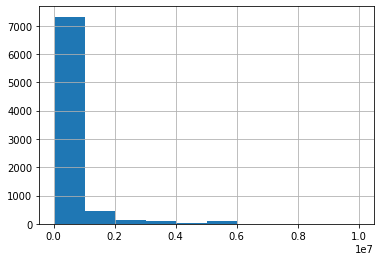

In [24]:
df.selling_price.hist()

### Handling Outliers Selling Price


In [25]:
# Computing 10th, 90th percentiles and replacing the outliers
print(df['selling_price'].quantile(0.10))
print(df['selling_price'].quantile(0.90))

150000.0
1025000.0


In [26]:
df["selling_price"] = np.where(df["selling_price"] <df['selling_price'].quantile(0.10), df['selling_price'].quantile(0.10),df['selling_price'])
df["selling_price"] = np.where(df["selling_price"] >df['selling_price'].quantile(0.90), df['selling_price'].quantile(0.90),df['selling_price'])
print(df['selling_price'].skew())

0.5571499026670337


<AxesSubplot:xlabel='selling_price'>

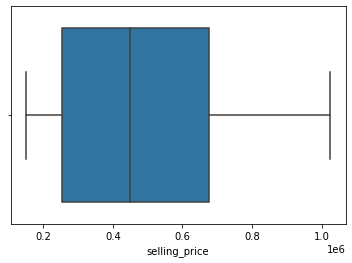

In [27]:
sns.boxplot(x=df["selling_price"])

Handling Outliers mileage 

In [28]:
print(df['mileage'].quantile(0.10))
print(df['mileage'].quantile(0.90))

13.988000000000001
24.7


<AxesSubplot:xlabel='mileage'>

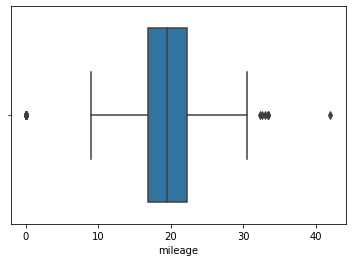

In [29]:
sns.boxplot(x=df["mileage"])

In [30]:
df["mileage"] = np.where(df["mileage"] <df['mileage'].quantile(0.10), df['mileage'].quantile(0.10),df['mileage'])
df["mileage"] = np.where(df["mileage"] >df['mileage'].quantile(0.90), df['mileage'].quantile(0.90),df['mileage'])
print(df['mileage'].skew())

-0.03038353380405013


<AxesSubplot:xlabel='mileage'>

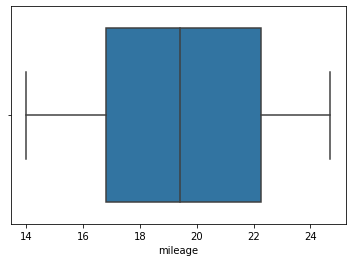

In [31]:
sns.boxplot(x=df["mileage"])

### Handling Outliers Km_driven

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

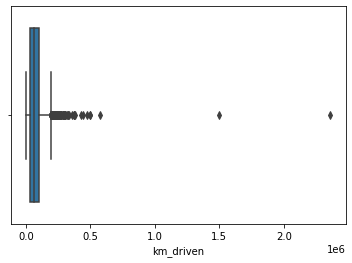

In [32]:
sns.boxplot(df["km_driven"])

In [33]:
df["km_driven"] = np.where(df["km_driven"] <df['km_driven'].quantile(0.10), df['km_driven'].quantile(0.10),df['km_driven'])
df["km_driven"] = np.where(df["km_driven"] >df['km_driven'].quantile(0.90), df['km_driven'].quantile(0.90),df['km_driven'])
print(df['km_driven'].skew())

0.169352986582077


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

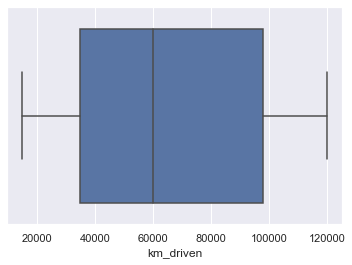

In [34]:
sns.set(style="darkgrid")
sns.boxplot(df["km_driven"])


### Handling Outliers engine (CC)

<AxesSubplot:xlabel='engine (CC)'>

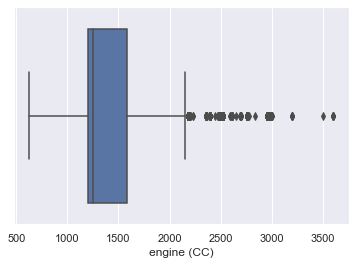

In [35]:
sns.set(style="darkgrid")
sns.boxplot(x=df["engine (CC)"])


In [36]:
df["engine (CC)"] = np.where(df["engine (CC)"] <df['engine (CC)'].quantile(0.10), df['engine (CC)'].quantile(0.10),df['engine (CC)'])
df["engine (CC)"] = np.where(df["engine (CC)"] >df['engine (CC)'].quantile(0.90), df['engine (CC)'].quantile(0.90),df['engine (CC)'])
print(df['engine (CC)'].skew())

0.9097318870750064


<AxesSubplot:xlabel='engine (CC)'>

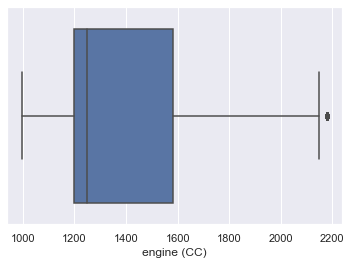

In [37]:
sns.set(style="darkgrid")
sns.boxplot(x=df["engine (CC)"])

# EDA

### Univariate Graphical EDA

### Quantitavie Variable

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

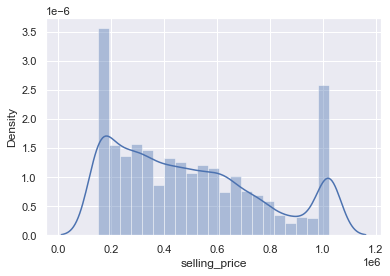

In [38]:
sns.distplot(df["selling_price"])

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

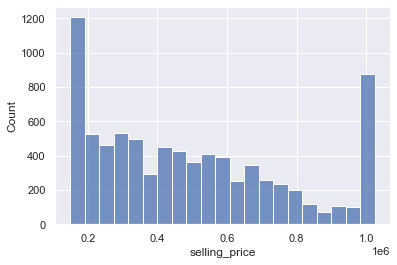

In [39]:
sns.histplot(df["selling_price"])

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

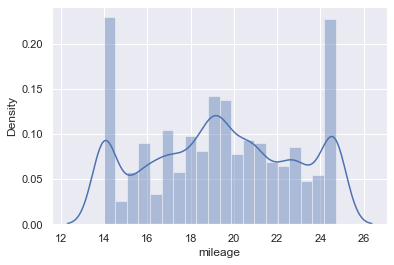

In [40]:
sns.distplot(df["mileage"])

<AxesSubplot:xlabel='mileage', ylabel='Count'>

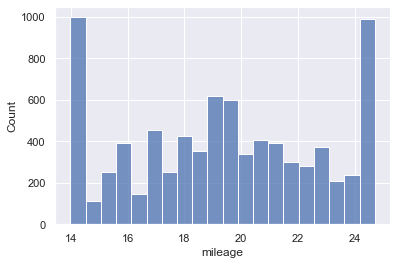

In [41]:
sns.histplot(df["mileage"])

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

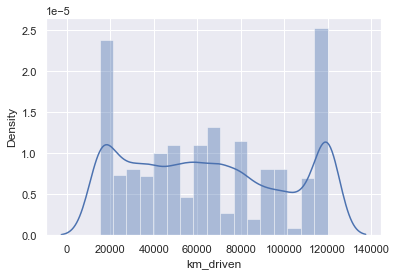

In [42]:
sns.distplot(df["km_driven"])

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

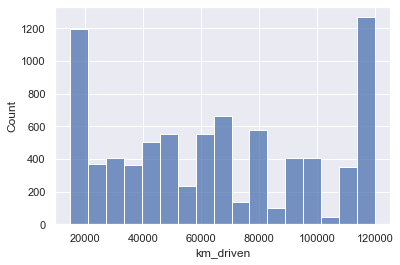

In [43]:
sns.histplot(df["km_driven"])

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engine (CC)', ylabel='Density'>

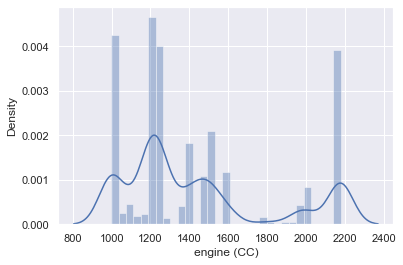

In [44]:
sns.distplot(df["engine (CC)"])

<AxesSubplot:xlabel='engine (CC)', ylabel='Count'>

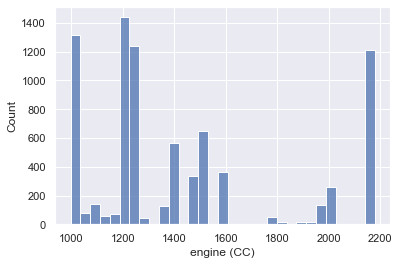

In [45]:
sns.histplot(df["engine (CC)"])

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='seats', ylabel='Density'>

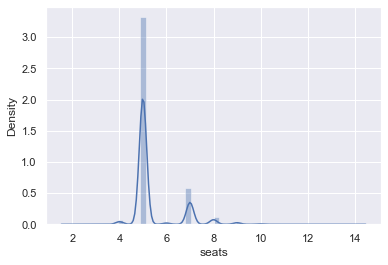

In [46]:
sns.distplot(df["seats"])

<AxesSubplot:xlabel='seats', ylabel='Count'>

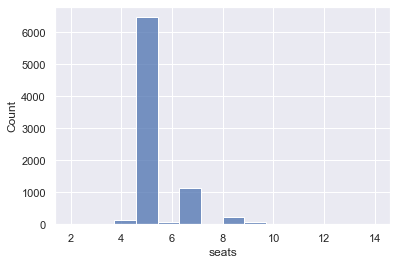

In [47]:
sns.histplot(df["seats"])

In [48]:
df['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [49]:
print(df['seats'].skew())

2.015507247545297


In [50]:
df.seats.value_counts()

5.0     6475
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

### Categorical Variable

In [51]:
pd.crosstab(index=df["fuel"],columns="Count")

col_0   Count
fuel         
CNG        57
Diesel   4402
LPG        38
Petrol   3631

<AxesSubplot:xlabel='fuel', ylabel='count'>

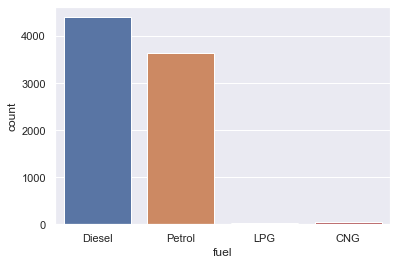

In [52]:
sns.countplot(x="fuel",data=df)

<AxesSubplot:xlabel='transmission', ylabel='count'>

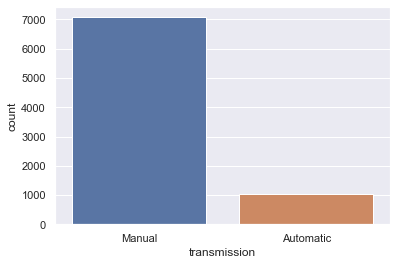

In [53]:
sns.countplot(x="transmission",data=df)

<AxesSubplot:xlabel='owner', ylabel='count'>

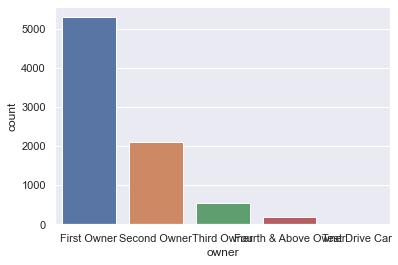

In [54]:
sns.countplot(x="owner",data=df)

<AxesSubplot:xlabel='seller_type', ylabel='count'>

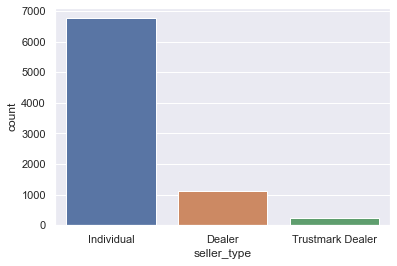

In [55]:
sns.countplot(x="seller_type",data=df)

### Bi-variate Graphical EDA

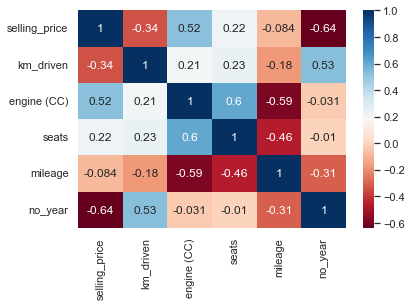

In [56]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

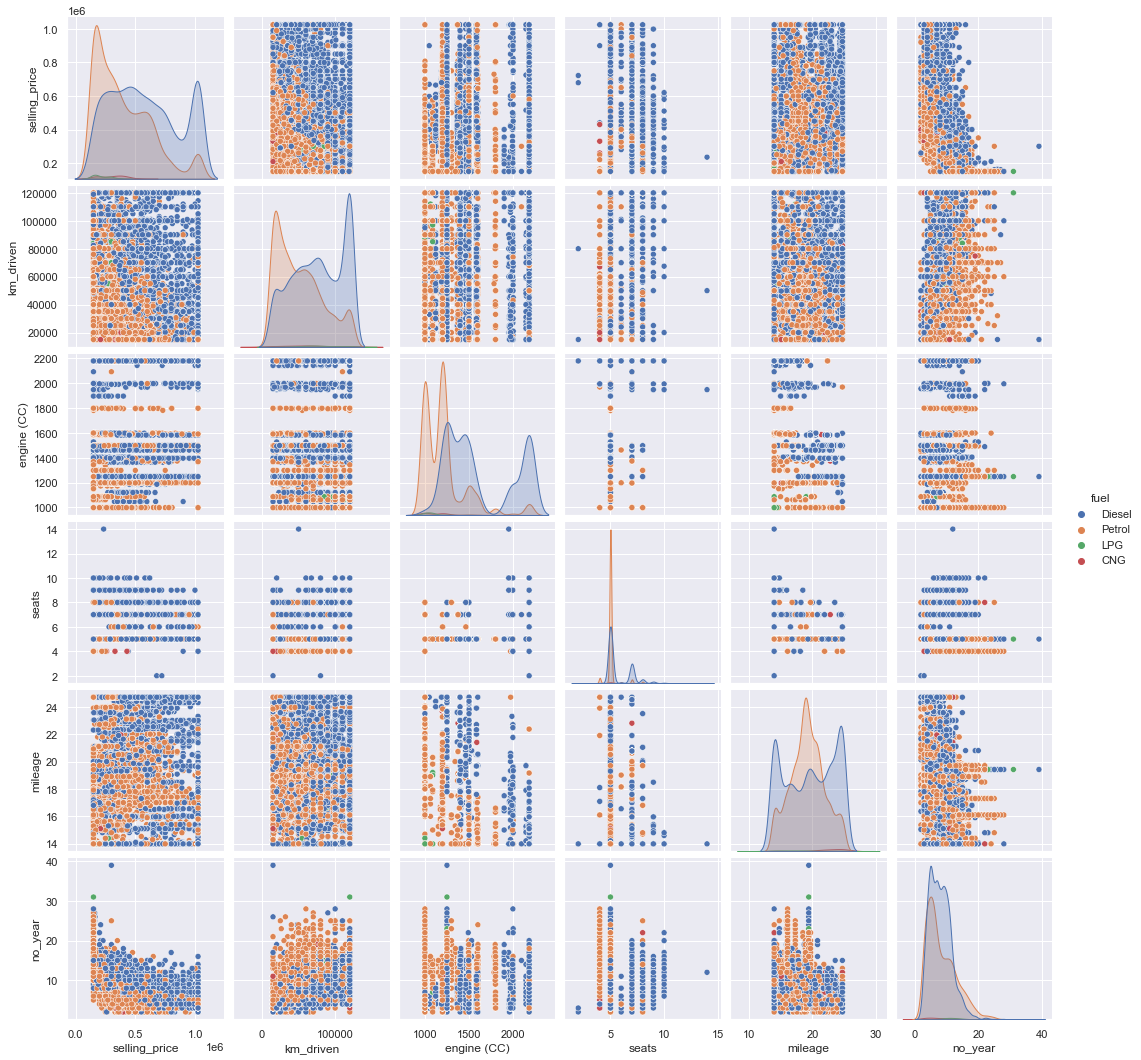

In [57]:
sns.pairplot(df,kind="scatter",hue="fuel")
plt.show()

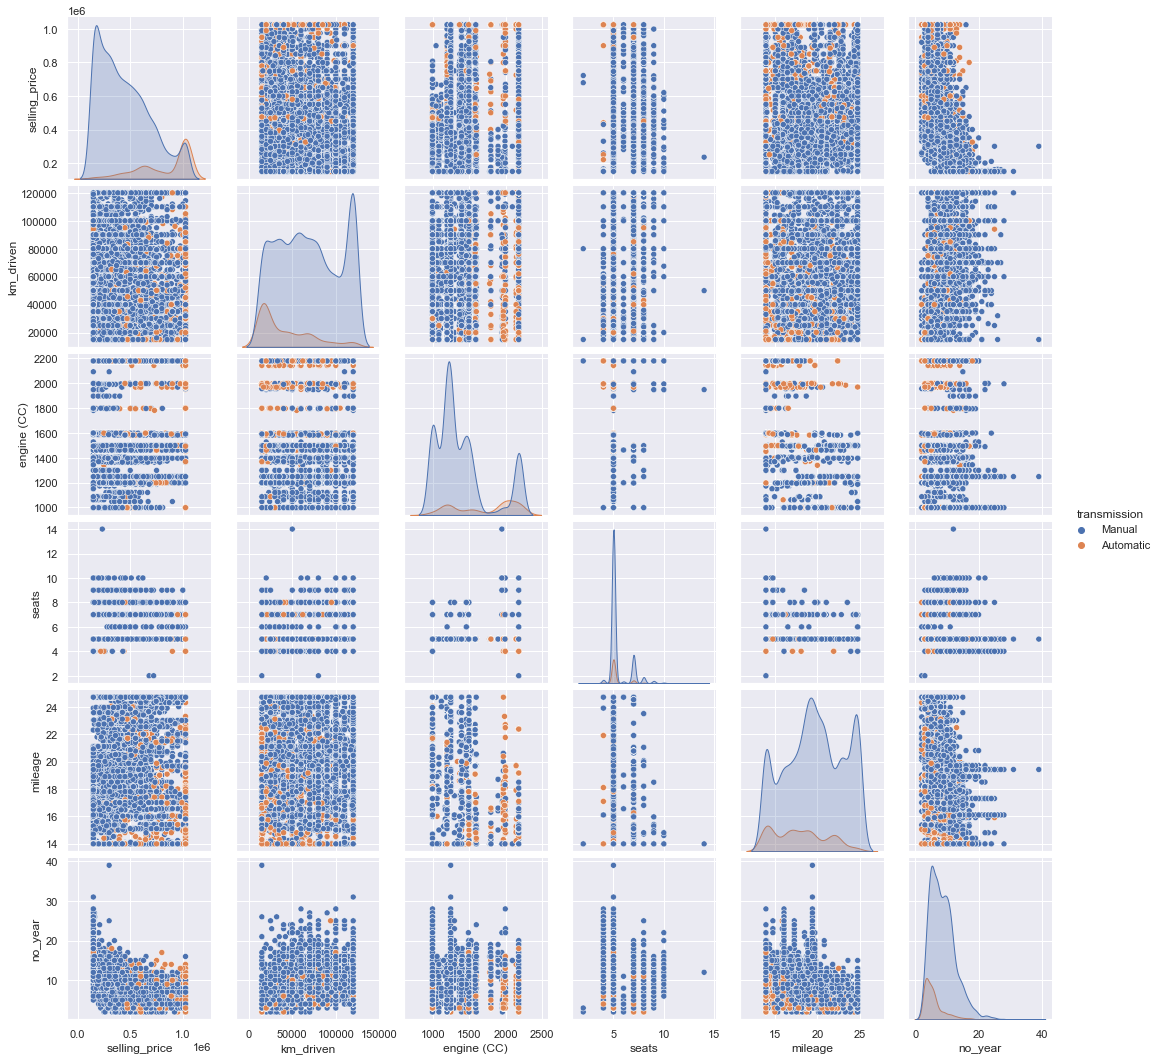

In [58]:
sns.pairplot(df,kind="scatter",hue="transmission")
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [60]:
df = pd.get_dummies(df,drop_first = True)
df.head()


selling_price  km_driven  engine (CC)  seats  mileage  no_year  name_Ashok  \
0       450000.0   120000.0       1248.0    5.0    23.40        8           0   
1       370000.0   120000.0       1498.0    5.0    21.14        8           0   
2       158000.0   120000.0       1497.0    5.0    17.70       16           0   
3       225000.0   120000.0       1396.0    5.0    23.00       12           0   
4       150000.0   120000.0       1298.0    5.0    16.10       15           0   

   name_Audi  name_BMW  name_Chevrolet  ...  fuel_Diesel  fuel_LPG  \
0          0         0               0  ...            1         0   
1          0         0               0  ...            1         0   
2          0         0               0  ...            0         0   
3          0         0               0  ...            1         0   
4          0         0               0  ...            0         0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0            0                       1                             0   
1            0                       1                             0   
2            1                       1                             0   
3            0                       1                             0   
4            1                       1                             0   

   transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                    1                           0                   0   
1                    1                           0                   1   
2                    1                           0                   0   
3                    1                           0                   0   
4                    1                           0                   0   

   owner_Test Drive Car  owner_Third Owner  
0                     0                  0  
1                     0                  0  
2                     0                  1  
3                     0                  0  
4                     0                  0  

[5 rows x 47 columns]

In [61]:
y=df["selling_price"]
X=df.drop(["selling_price"],axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6502, 46)
x test:  (1626, 46)
y train:  (6502,)
y test:  (1626,)


In [63]:
# now let's see the shape of train and test dataset
print(X.shape,X_train.shape,X_test.shape)


(8128, 46) (6502, 46) (1626, 46)


In [64]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

### Linear Regression

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.77577689 0.7728046  0.78091591 0.77555482 0.76732155]
Train CV mean : 0.77


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


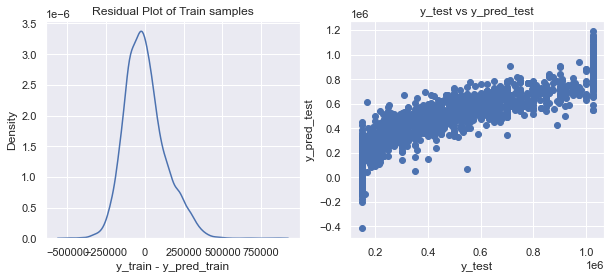

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

### Ridge Regression

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.77580432 0.77325806 0.78262783 0.77482745 0.76782583]
Train CV mean : 0.77


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


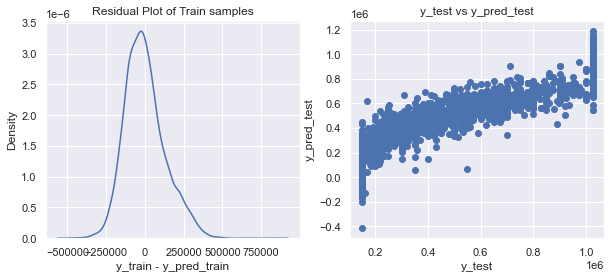

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

### Lasso Regression

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.411e+13, tolerance: 4.011e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.426e+13, tolerance: 4.030e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.416e+13, tolerance: 4.011e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.395e+13, tolerance: 4.023e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.619e+13, tolerance: 3.222e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.549e+13, tolerance: 3.248e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.493e+13, tolerance: 3.177e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.514e+13, tolerance: 3.171e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.535e+13, tolerance: 3.241e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.555e+13, tolerance: 3.245e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.164e+13, tolerance: 3.134e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.282e+13, tolerance: 3.163e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.976e+12, tolerance: 3.168e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.505e+13, tolerance: 3.147e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e+13, tolerance: 3.160e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.529e+13, tolerance: 3.226e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e+13, tolerance: 3.160e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.528e+13, tolerance: 3.226e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.783e+12, tolerance: 3.207e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.508e+13, tolerance: 3.154e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.7759082  0.77333678 0.78260017 0.77534959 0.76775624]
Train CV mean : 0.77


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


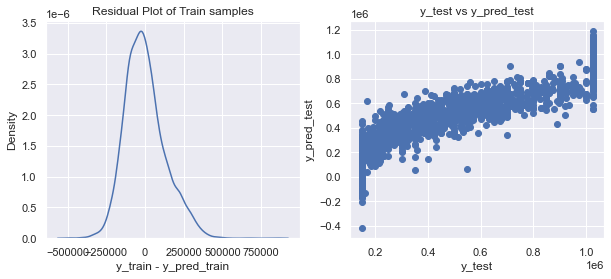

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

In [68]:
print('Actual value: ',y_test.iloc[114])

Actual value:  165000.0


In [69]:
rg.fit(X_train,y_train)
ls.fit(X_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.514e+13, tolerance: 5.007e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [70]:
lin_pred = lr.predict(X_test)
rid_pred = rg.predict(X_test)
lasso_pred = ls.predict(X_test)

In [71]:
print('Prediction by Linear Regression: ',lin_pred[114])
print('Prediction by Ridge Regression: ',rid_pred[114])
print('Prediction by Lasso Regression: ',lasso_pred[114])

Prediction by Linear Regression:  205841.89012836106
Prediction by Ridge Regression:  205709.42796205368
Prediction by Lasso Regression:  205721.53892232018


### Random Forest 

In [72]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.91
Test R2-score : 0.88
Train CV scores : [0.88821931 0.8787123  0.90218251 0.89311226 0.8794109 ]
Train CV mean : 0.89


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


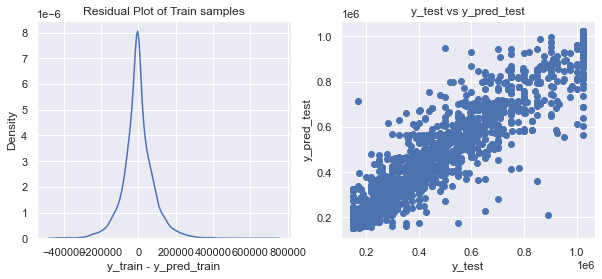

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=8,
                      n_estimators=700)


In [73]:
car_pred_model(rf_rs,'random_forest.pkl')
print(rf_rs.best_estimator_)

### Gradient Boosting

Train R2-score : 0.97
Test R2-score : 0.92
Train CV scores : [0.92120317 0.91474275 0.9259478  0.92120266 0.92062773]
Train CV mean : 0.92


C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


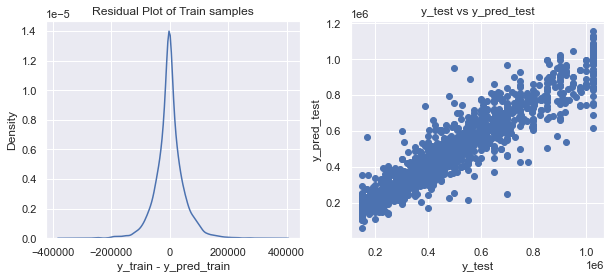

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [75]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

Model  R Squared(Train)  R Squared(Test)  \
0           LinearRegression              0.78             0.78   
1                      Ridge              0.78             0.78   
2                      Lasso              0.78             0.78   
3      RandomForestRegressor              0.91             0.88   
4  GradientBoostingRegressor              0.97             0.92   

   CV score mean(Train)  
0                  0.77  
1                  0.77  
2                  0.77  
3                  0.89  
4                  0.92

In [76]:
lr.predict(X_test)

array([396194.69269485, 741435.03243743, 730182.60818647, ...,
       222274.3370266 , 622587.61518508, 647725.86586703])

In [77]:
X_test.head()


km_driven  engine (CC)  seats  mileage  no_year  name_Ashok  name_Audi  \
1392    80000.0       2179.0    7.0   13.988       17           0          0   
7778    45000.0       2179.0    7.0   17.600        5           0          0   
3727    60000.0       1396.0    5.0   22.540        3           0          0   
6630    15000.0       1199.0    5.0   23.840        2           0          0   
103    100000.0       1196.0    7.0   15.370        6           0          0   

      name_BMW  name_Chevrolet  name_Daewoo  ...  fuel_Diesel  fuel_LPG  \
1392         0               0            0  ...            1         0   
7778         0               0            0  ...            1         0   
3727         0               0            0  ...            1         0   
6630         0               0            0  ...            0         0   
103          0               0            0  ...            0         0   

      fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
1392            0                       1                             0   
7778            0                       1                             0   
3727            0                       1                             0   
6630            1                       1                             0   
103             1                       1                             0   

      transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
1392                    1                           0                   0   
7778                    1                           0                   0   
3727                    1                           0                   0   
6630                    1                           0                   0   
103                     1                           0                   0   

      owner_Test Drive Car  owner_Third Owner  
1392                     0                  0  
7778                     0                  0  
3727                     0                  0  
6630                     0                  0  
103                      0                  1  

[5 rows x 46 columns]

In [78]:
y_test.iloc[0]

250000.0

In [79]:
# prediction by linear regression
lin_pred = lr.predict(X_test)

In [80]:
lin_pred[0]

396194.69269485306

In [81]:
# fitting in ridge regression
rg.fit(X_train,y_train)

Ridge()

In [82]:
# prediction by ridge regression
rid_pred = rg.predict(X_test)

In [83]:
rid_pred[0]

396542.7624439808

In [84]:
# fitting in lasso regression
ls.fit(X_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.514e+13, tolerance: 5.007e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [85]:
# prediction by ridge regression
lasso_pred = ls.predict(X_test)

In [86]:
lasso_pred[0]

395915.8893437494

In [87]:
# fitting in random forrest
rf.fit(X_train,y_train)

RandomForestRegressor()

In [88]:
# prediction by ridge regression
ran_for_pred = rf.predict(X_test)

In [89]:
ran_for_pred[0]

255800.0

In [90]:
# fitting in gradiant boosting
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [91]:
# prediction by ridge regression
grad_pred = gb.predict(X_test)

In [92]:
grad_pred[0]

322336.21933260147

In [100]:
print('Actual value: ',y_test.iloc[401])
print('Prediction by Linear Regression: ',lin_pred[401])
print('Prediction by Ridge Regression: ',rid_pred[401])
print('Prediction by Lasso Regression: ',lasso_pred[401])
print('Prediction by Random Forest: ',ran_for_pred[401])
print('Prediction by Gradiant Boosting: ',grad_pred[401])


Actual value:  235000.0
Prediction by Linear Regression:  170410.00727189844
Prediction by Ridge Regression:  170998.44812621444
Prediction by Lasso Regression:  170295.11713566876
Prediction by Random Forest:  243299.98
Prediction by Gradiant Boosting:  236904.69217178048


In [ ]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train_pca,y_train_pca)

model.score(X_test_pca,y_test_pca)